# Exploratory Data Analysis for Channels as Scalars

Data was taken from:
`/storage/groups/ml01/datasets/raw/20201020_Pelkmans_NascentRNA_hannah.spitzer/` and server `vicb-submit-01`. 

Load libraries and set Directories paths:

In [1]:
import numpy as np
import pandas as pd
# To display all the columns
pd.options.display.max_columns = None
import os
import sys
import matplotlib.pyplot as plt
import json
import seaborn as sns
sns.set_style('darkgrid')

# Set paths
BASE_DIR = os.path.realpath(os.path.join(os.path.abspath(''),'../..'))
if not os.path.exists(BASE_DIR):
    raise Exception('Base path {} does not exist!'.format(BASE_DIR))
else:
    print('BASE_DIR: {}'.format(BASE_DIR))
    
DATA_DIR = '/home/hhughes/Documents/Master_Thesis/Project/datasets/184A1_hannah_imgs_no_split'
if not os.path.exists(DATA_DIR):
    raise Exception('Data path {} does not exist!'.format(DATA_DIR))
else:
    print('DATA_DIR: {}'.format(DATA_DIR))
    
# Add BASE_DIR to sys paths (for loading libraries)
sys.path.insert(1, os.path.join(BASE_DIR, 'workspace/libs'))
# Load mpp_data library to convert raw data into images
from pelkmans.mpp_data import MPPData as MPPData

BASE_DIR: /home/hhughes/Documents/Master_Thesis/Project
DATA_DIR: /home/hhughes/Documents/Master_Thesis/Project/datasets/184A1_hannah_imgs_no_split


Load pre-processed data

In [2]:
print('Available files in data dir {}:\n{}'.format(DATA_DIR, os.listdir(DATA_DIR)))

# Load files
metadata = pd.read_csv(os.path.join(DATA_DIR, 'metadata.csv'))
metadata = metadata.groupby(['mapobject_id_cell'], sort=False, as_index=False).first()
channels = pd.read_csv(os.path.join(DATA_DIR, 'channels.csv'))
with open(os.path.join(DATA_DIR, 'params.json')) as params_file:
    param = json.load(params_file)


Available files in data dir /home/hhughes/Documents/Master_Thesis/Project/datasets/184A1_hannah_imgs_no_split:
['params.json', 'data', 'channels.csv', 'metadata.csv']


Take a look into the data

In [3]:
metadata

,mapobject_id_cell,mapobject_id,plate_name,well_name,well_pos_y,well_pos_x,tpoint,zplane,label,is_border,plate_name_cell,well_name_cell,well_pos_y_cell,well_pos_x_cell,tpoint_cell,zplane_cell,label_cell,is_border_cell,is_mitotic,is_mitotic_labels,is_polynuclei_HeLa,is_polynuclei_HeLa_labels,is_polynuclei_184A1,is_polynuclei_184A1_labels,cell_cycle,cell_type,perturbation,duration,cell_size,00_DAPI_avg,07_H2B_avg,01_CDK9_pT186_avg,03_CDK9_avg,05_GTF2B_avg,07_SETD1A_avg,08_H3K4me3_avg,09_SRRM2_avg,10_H3K27ac_avg,11_KPNA2_MAX_avg,12_RB1_pS807_S811_avg,13_PABPN1_avg,14_PCNA_avg,15_SON_avg,16_H3_avg,17_HDAC3_avg,19_KPNA1_MAX_avg,20_SP100_avg,21_NCL_avg,01_PABPC1_avg,02_CDK7_avg,03_RPS6_avg,05_Sm_avg,07_POLR2A_avg,09_CCNT1_avg,10_POL2RA_pS2_avg,11_PML_avg,12_YAP1_avg,13_POL2RA_pS5_avg,15_U2SNRNPB_avg,18_NONO_avg,20_ALYREF_avg,21_COIL_avg,00_BG488_avg,00_BG568_avg,00_EU_avg,09_SRRM2_ILASTIK_avg,15_SON_ILASTIK_avg
0,369487,369581,plate01,I18,0,0,0,0,9,0,plate01,I18,0,0,0,0,9,0,0.0,NaN,0.0,NaN,0.0,NaN,S,184A1,CX5461,120.0,13503.0,44.790928,208.676435,15.962250,29.289384,84.024075,24.177410,46.880668,50.661738,107.367649,59.570214,95.348947,162.164103,75.340100,41.983402,233.016897,75.355192,83.016410,19.006747,47.585081,21.462703,119.898365,22.528784,45.912931,104.033265,80.562506,303.177564,11.478352,93.097852,221.812826,39.005296,287.133040,266.622592,7.860114,6.162881,1.671627,342.910464,7830.081611,10304.112271
1,369488,369582,plate01,I18,0,0,0,0,10,0,plate01,I18,0,0,0,0,10,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,CX5461,120.0,9775.0,44.693453,192.564041,14.927710,32.759411,92.919336,27.445029,50.696422,53.129896,67.922149,41.104070,101.088256,191.014345,45.255686,49.039914,196.708995,66.276975,63.790027,21.981683,40.383979,14.368812,146.185885,19.856793,46.780805,132.973481,85.893447,288.406003,14.120230,102.825017,205.574996,42.433129,312.214706,231.791821,8.029727,6.515615,1.657841,182.502609,7826.491151,10242.813811
2,369489,369583,plate01,I18,0,0,0,0,11,0,plate01,I18,0,0,0,0,11,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,CX5461,120.0,10330.0,40.628654,224.238141,11.883508,25.218904,88.832127,29.588301,46.845729,54.031310,61.636522,47.324893,120.000485,186.245955,58.354520,43.540287,263.274235,72.690354,76.520639,26.116184,47.600271,18.067183,125.463465,20.618981,52.433856,121.306955,80.992489,292.695766,13.591581,111.875495,221.776828,39.558433,333.519357,310.301499,8.908267,6.080175,1.548610,195.049564,6211.161568,10094.878316
3,369490,369584,plate01,I18,0,0,0,0,12,0,plate01,I18,0,0,0,0,12,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,CX5461,120.0,9867.0,47.190139,255.008827,8.761640,22.483270,86.429829,7.113698,28.268655,50.675528,54.239803,39.124333,88.022382,157.279270,31.450823,28.895709,260.202417,59.677551,66.606941,10.139325,47.945185,16.539284,105.200716,20.212364,47.114630,55.256595,58.227016,254.808453,10.881472,98.594081,247.179793,37.353835,326.267001,289.691050,7.332875,5.868882,1.554583,192.862674,6784.361001,7852.095976
4,369491,369585,plate01,I18,0,0,0,0,13,0,plate01,I18,0,0,0,0,13,0,0.0,NaN,0.0,NaN,0.0,NaN,S,184A1,CX5461,120.0,26927.0,44.595874,155.674791,22.491115,34.184902,118.482454,43.344288,51.013306,58.614662,52.146755,78.335567,127.013187,171.134241,75.371029,45.063884,164.659560,78.160541,86.018186,18.520590,35.027228,25.870875,225.888079,24.161104,54.150928,151.001520,112.756650,267.606364,18.161617,154.100137,183.721177,47.454413,289.719015,209.839964,9.956070,7.354605,1.695586,269.511643,7898.951239,9751.622238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11905,266516,266565,plate01,J12,5,4,0,0,44,0,plate01,J12,5,4,0,0,44,0,0.0,NaN,0.0,NaN,0.0,NaN,G2,184A1,normal,NaN,19401.0,38.974759,76.047797,17.563898,36.184834,104.156500,36.770887,50.232165,39.952018,108.585726,60.649794,121.661078,190.923176,43.49

In [4]:
mask = metadata.perturbation == 'normal'
metadata[mask].well_name.unique()

array(['J10', 'I09', 'I11', 'J12'], dtype=object)

In [5]:
meta_small = metadata[['mapobject_id_cell', 'well_name', 'cell_cycle', 'perturbation', 'duration', '00_EU_avg']].copy()
meta_small

,mapobject_id_cell,well_name,cell_cycle,perturbation,duration,00_EU_avg
0,369487,I18,S,CX5461,120.0,342.910464
1,369488,I18,G1,CX5461,120.0,182.502609
2,369489,I18,G1,CX5461,120.0,195.049564
3,369490,I18,G1,CX5461,120.0,192.862674
4,369491,I18,S,CX5461,120.0,269.511643
...,...,...,...,...,...,...
11905,266516,J12,G2,normal,NaN,454.006752
11906,266518,J12,G1,normal,NaN,539.162437
11907,266519,J12,G2,normal,NaN,441.322981
11908,266520,J12,G1,normal,NaN,387.570989


1.- Primero solo distribucion para ver que factores afectan el transcription rate

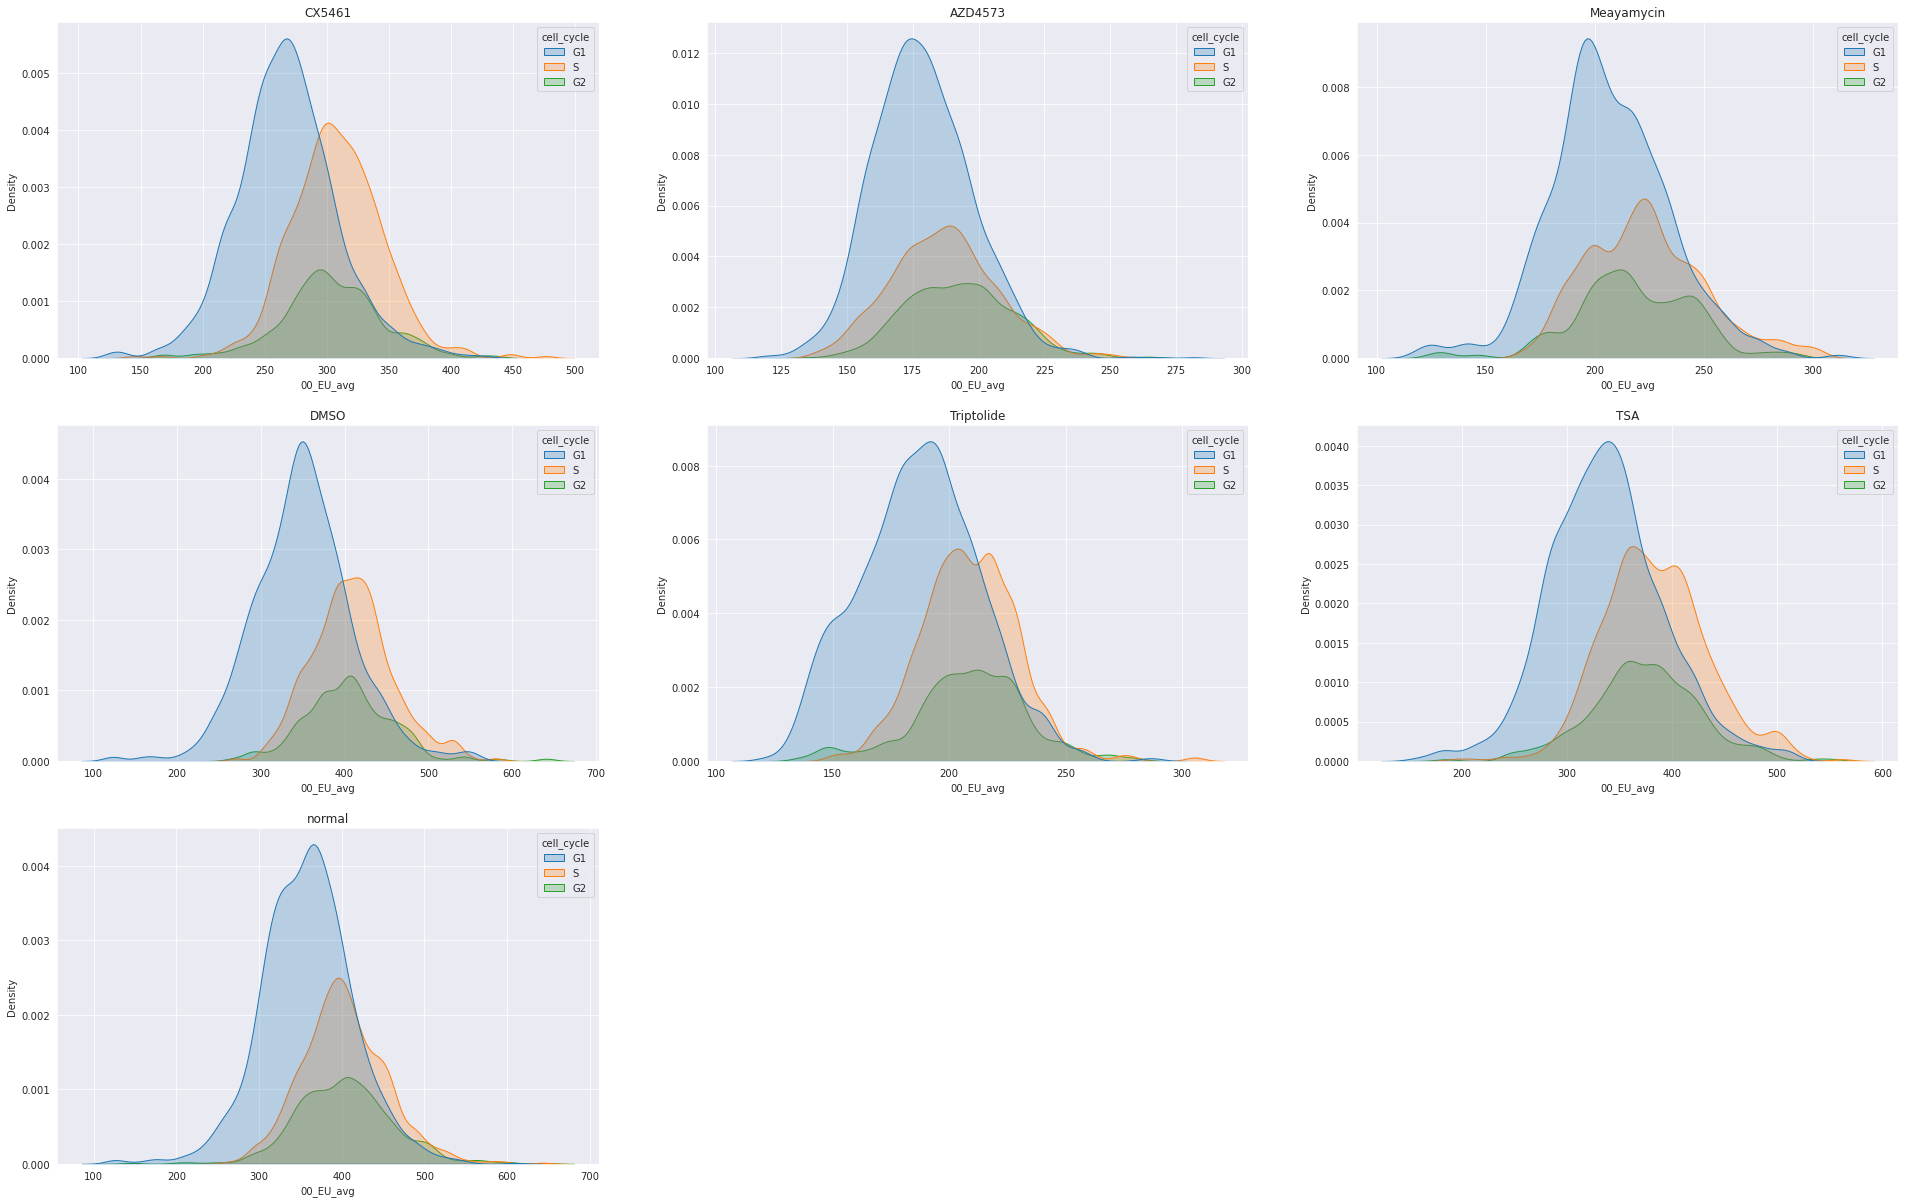

In [6]:
perturbations = meta_small.perturbation.unique()
cell_cycle_order=['G1', 'S', 'G2']

plt.figure(figsize=(3*11,3*7))
for i, per in enumerate(perturbations, 1):
    mask = meta_small.perturbation == per
    
    plt.subplot(3,3,i)
    sns.kdeplot(x='00_EU_avg', 
                hue='cell_cycle', 
                hue_order=cell_cycle_order,
                data=meta_small[mask], 
                shade=True, 
                bw_method=0.2)
    plt.title(per)

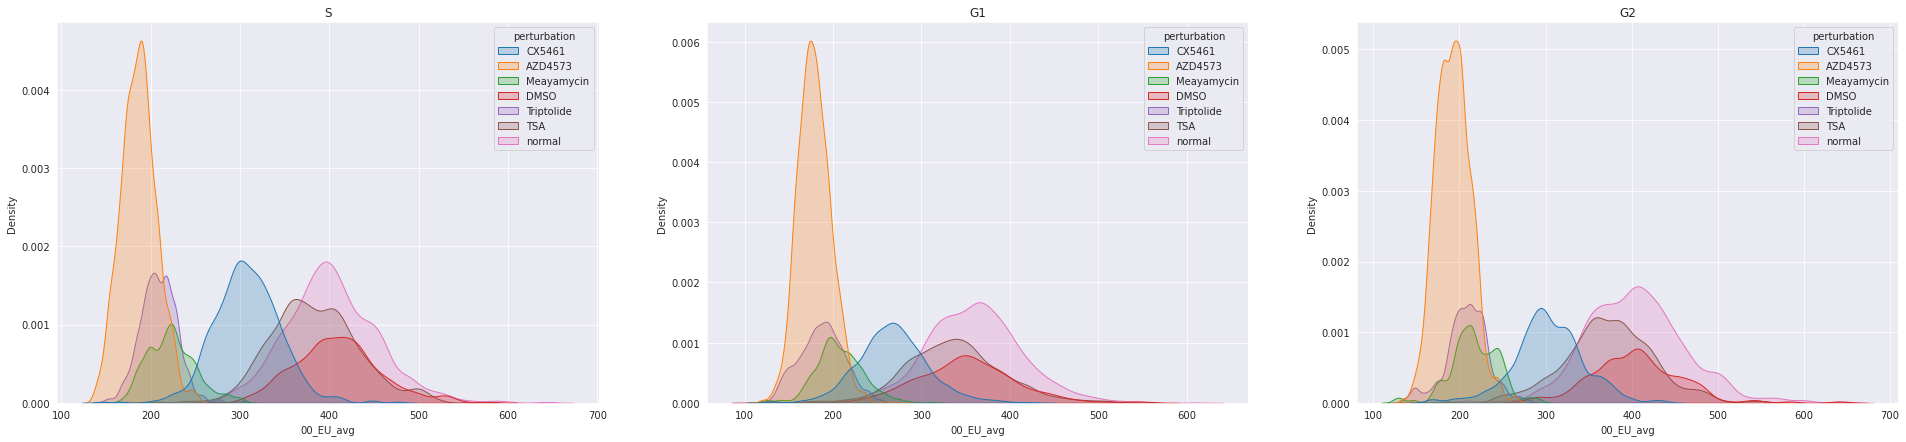

In [7]:
cell_cycles = meta_small.cell_cycle.unique()

plt.figure(figsize=(3*11,7))
for i, cc in enumerate(cell_cycles, 1):
    mask = meta_small.cell_cycle == cc
    
    plt.subplot(1,3,i)
    sns.kdeplot(x='00_EU_avg', 
                hue='perturbation', 
                #hue_order=cell_cycle_order,
                data=meta_small[mask], 
                shade=True, 
                bw_method=0.2)
    plt.title(cc)

Text(0.5, 1.0, 'Avg(00_EU) distribution')

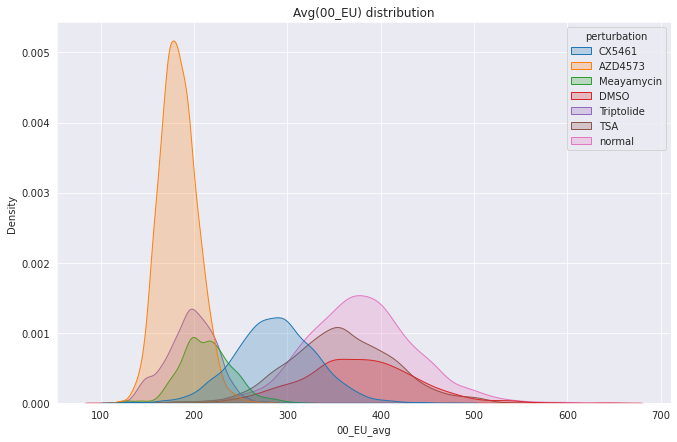

In [8]:
cell_cycles = meta_small.cell_cycle.unique()

plt.figure(figsize=(11,7))

sns.kdeplot(x='00_EU_avg', 
                hue='perturbation', 
                #hue_order=cell_cycle_order,
                data=meta_small, 
                shade=True, 
                bw_method=0.2)
plt.title('Avg(00_EU) distribution')

# 1.- Does Cell Cycle influence the TR?

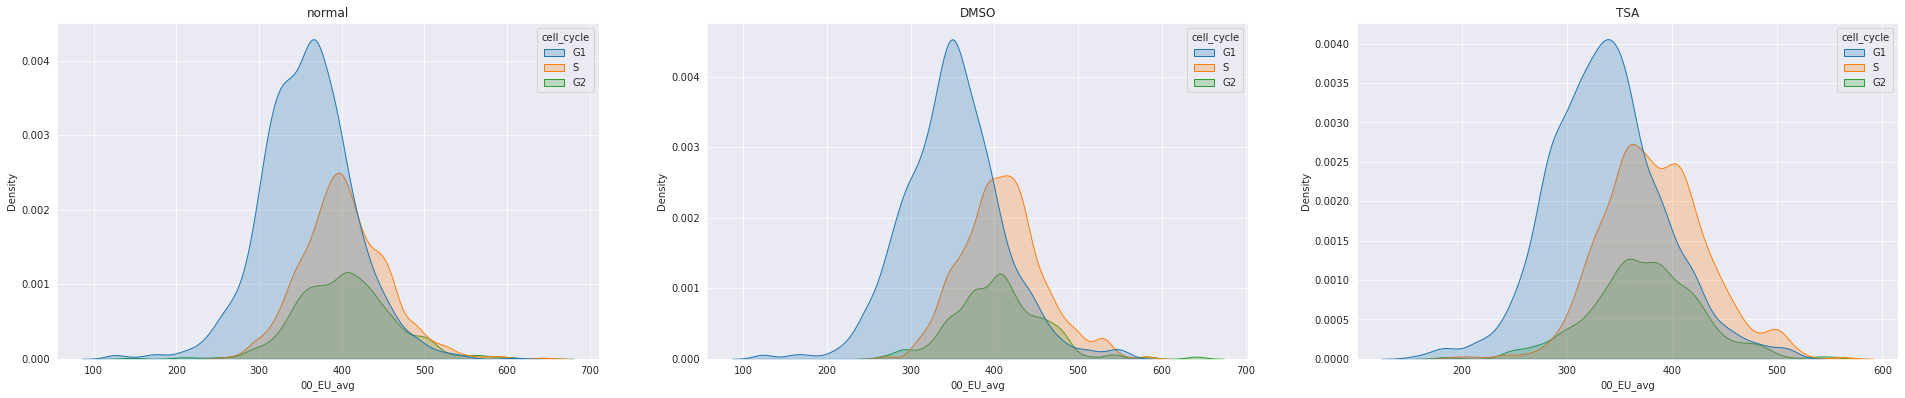

In [9]:
#perturbations = meta_small.perturbation.unique()
perturbations = ['normal', 'DMSO', 'TSA']
cell_cycle_order=['G1', 'S', 'G2']

plt.figure(figsize=(3*11,3*7))
for i, per in enumerate(perturbations, 1):
    mask = meta_small.perturbation == per
    
    plt.subplot(3,3,i)
    sns.kdeplot(x='00_EU_avg', 
                hue='cell_cycle', 
                hue_order=cell_cycle_order,
                data=meta_small[mask], 
                shade=True, 
                bw_method=0.2)
    plt.title(per)

## Yes!

In [16]:
mask = meta_small.perturbation.isin(perturbations)
no_per_df = meta_small[mask].copy()
no_per_df['cell_cycle'].value_counts()

G1    2070
S     1070
G2     563
Name: cell_cycle, dtype: int64

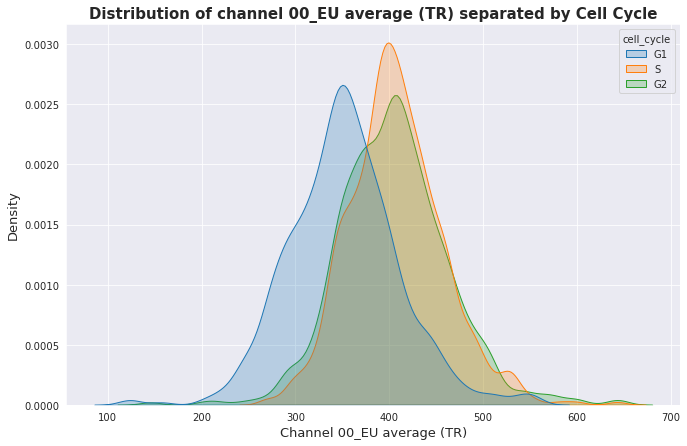

In [51]:
mask = meta_small.perturbation.isin(perturbations)
no_per_df = meta_small[mask].copy()
n_cells = 563

mask = (no_per_df.cell_cycle == 'G1')
G1_df = no_per_df[mask]
ids = G1_df.mapobject_id_cell.values
np.random.shuffle(ids)
mask = G1_df.mapobject_id_cell.isin(ids[0:n_cells])
G1_df = G1_df[mask]

mask = (no_per_df.cell_cycle == 'S')
S_df = no_per_df[mask]
ids = S_df.mapobject_id_cell.values
np.random.shuffle(ids)
mask = S_df.mapobject_id_cell.isin(ids[0:n_cells])
S_df = S_df[mask]

mask = (no_per_df.cell_cycle == 'G2')
G2_df = no_per_df[mask]

no_per_df = pd.concat((G1_df, S_df, G2_df), axis=0, ignore_index=True)

cell_cycle_order=['G1', 'S', 'G2']

fig = plt.figure(figsize=(11, 7))
sns.kdeplot(x='00_EU_avg', 
                hue='cell_cycle', 
                hue_order=cell_cycle_order,
                data=no_per_df, 
                shade=True, 
                bw_method=0.2)
_ = plt.title('Distribution of channel 00_EU average (TR) separated by Cell Cycle', fontweight='bold', fontsize=15)
plt.xlabel('Channel 00_EU average (TR)', fontsize=13)
plt.ylabel('Density', fontsize=13)
fig.savefig('./temp.jpg', bbox_inches='tight', pad_inches=0)

Text(0.5, 1.0, 'Avg(00_EU) distribution separated by Cell Cycle')

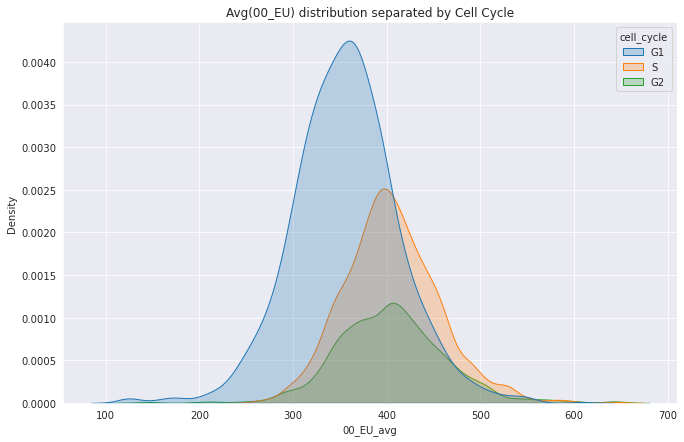

In [10]:
#perturbations = meta_small.perturbation.unique()
perturbations = ['normal', 'DMSO']
cell_cycle_order=['G1', 'S', 'G2']

plt.figure(figsize=(11, 7))
mask = meta_small.perturbation.isin(perturbations)
    
sns.kdeplot(x='00_EU_avg', 
                hue='cell_cycle', 
                hue_order=cell_cycle_order,
                data=meta_small[mask], 
                shade=True, 
                bw_method=0.2)
plt.title('Avg(00_EU) distribution separated by Cell Cycle')

# 2.- Has the TR the same distribution under the perturbations DMSO, TSA y Normal?

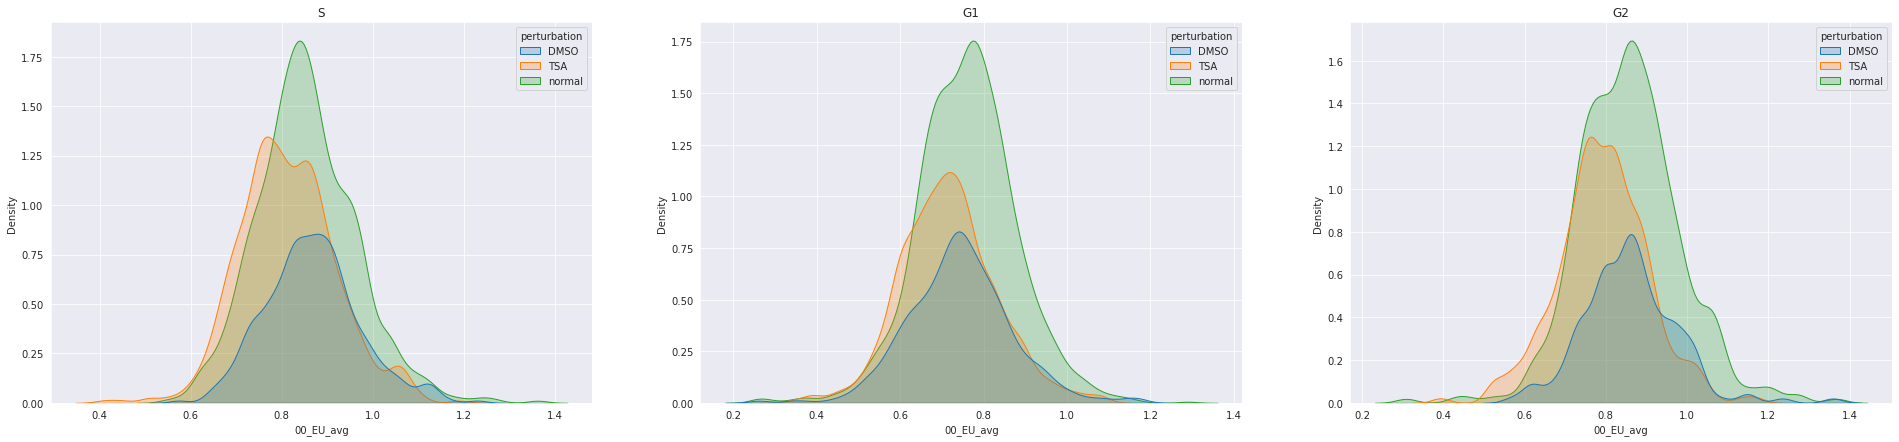

In [54]:
cell_cycles = meta_small.cell_cycle.unique()

plt.figure(figsize=(3*11,7))
for i, cc in enumerate(cell_cycles, 1):
    mask = meta_small.cell_cycle == cc
    mask &= (meta_small.perturbation == 'normal') | (meta_small.perturbation == 'DMSO') | (meta_small.perturbation == 'TSA')
    
    plt.subplot(1,3,i)
    sns.kdeplot(x='00_EU_avg', 
                hue='perturbation', 
                #hue_order=cell_cycle_order,
                data=meta_small[mask], 
                shade=True, 
                bw_method=0.2)
    plt.title(cc)

## Almost, aparentlly the TSA has a lower TR mean.

# 3.- Does the well_name influence the TR distribution?

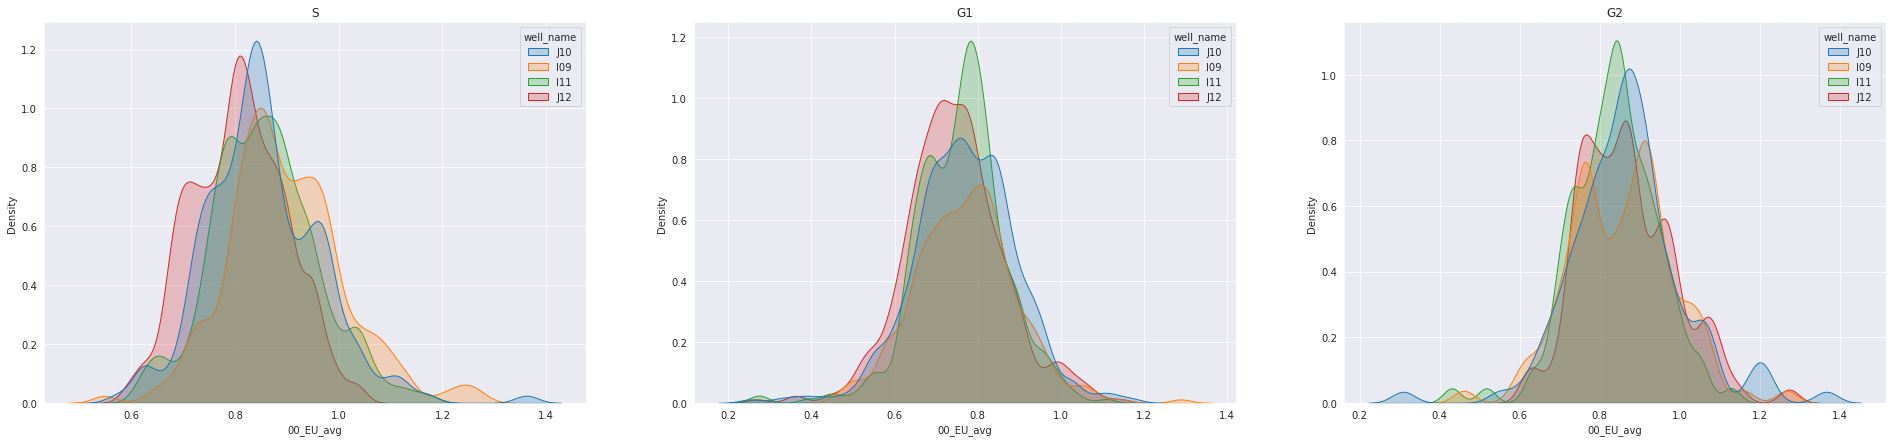

In [62]:
cell_cycles = meta_small.cell_cycle.unique()

plt.figure(figsize=(3*11,7))
for i, cc in enumerate(cell_cycles, 1):
    mask = meta_small.cell_cycle == cc
    mask &= (meta_small.perturbation == 'normal')
    
    plt.subplot(1,3,i)
    sns.kdeplot(x='00_EU_avg', 
                hue='well_name', 
                #hue_order=cell_cycle_order,
                data=meta_small[mask], 
                shade=True, 
                bw_method=0.2)
    plt.title(cc)

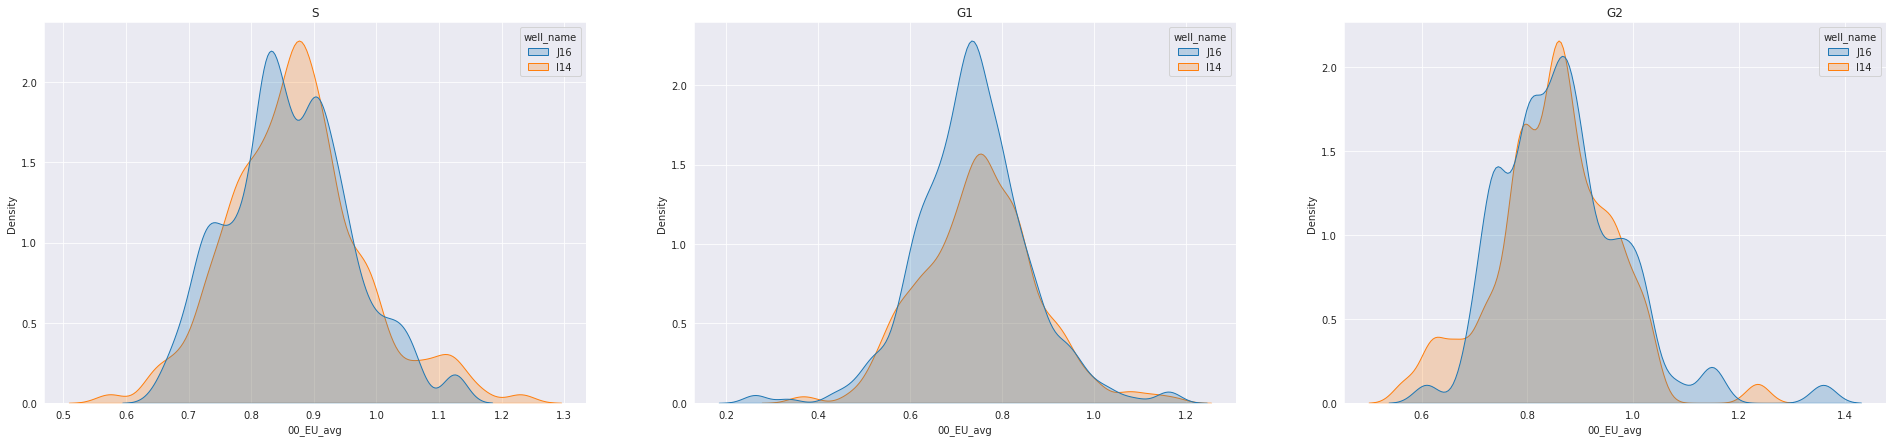

In [63]:
cell_cycles = meta_small.cell_cycle.unique()

plt.figure(figsize=(3*11,7))
for i, cc in enumerate(cell_cycles, 1):
    mask = meta_small.cell_cycle == cc
    mask &= (meta_small.perturbation == 'DMSO')
    
    plt.subplot(1,3,i)
    sns.kdeplot(x='00_EU_avg', 
                hue='well_name', 
                #hue_order=cell_cycle_order,
                data=meta_small[mask], 
                shade=True, 
                bw_method=0.2)
    plt.title(cc)

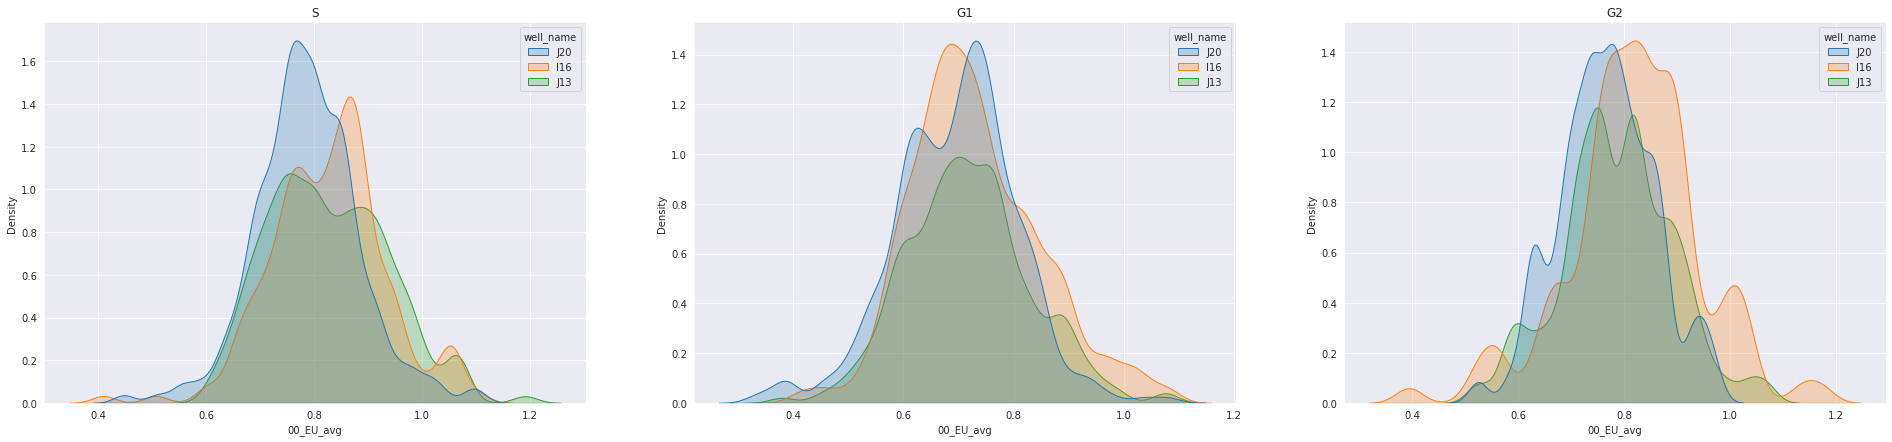

In [64]:
cell_cycles = meta_small.cell_cycle.unique()

plt.figure(figsize=(3*11,7))
for i, cc in enumerate(cell_cycles, 1):
    mask = meta_small.cell_cycle == cc
    mask &= (meta_small.perturbation == 'TSA')
    
    plt.subplot(1,3,i)
    sns.kdeplot(x='00_EU_avg', 
                hue='well_name', 
                #hue_order=cell_cycle_order,
                data=meta_small[mask], 
                shade=True, 
                bw_method=0.2)
    plt.title(cc)

## Aparentlly no (at least for perturbations normal, TSA, DMSO

# Does the duration influence the TR distribution?

In [71]:
mask = meta_small.perturbation == 'normal'
meta_small[mask].duration.unique()

array([nan])

The "duration" is the time in secons that the perturbation was cleaned. Therefore, in "normal" is nan (no cleaning needed)

In [72]:
mask = meta_small.perturbation == 'DMSO'
meta_small[mask].duration.unique()

array([720., 120.])

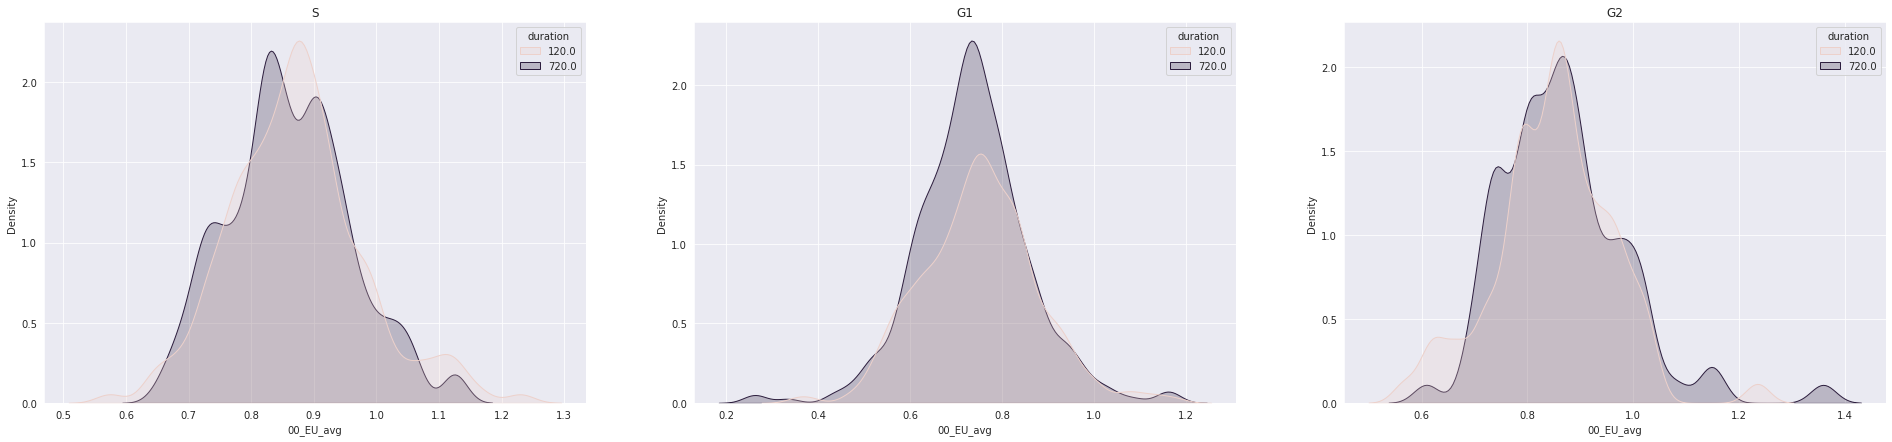

In [66]:
cell_cycles = meta_small.cell_cycle.unique()

plt.figure(figsize=(3*11,7))
for i, cc in enumerate(cell_cycles, 1):
    mask = meta_small.cell_cycle == cc
    mask &= (meta_small.perturbation == 'DMSO')
    
    plt.subplot(1,3,i)
    sns.kdeplot(x='00_EU_avg', 
                hue='duration', 
                #hue_order=cell_cycle_order,
                data=meta_small[mask], 
                shade=True, 
                bw_method=0.2)
    plt.title(cc)

In [73]:
mask = meta_small.perturbation == 'TSA'
meta_small[mask].duration.unique()

array([30.])

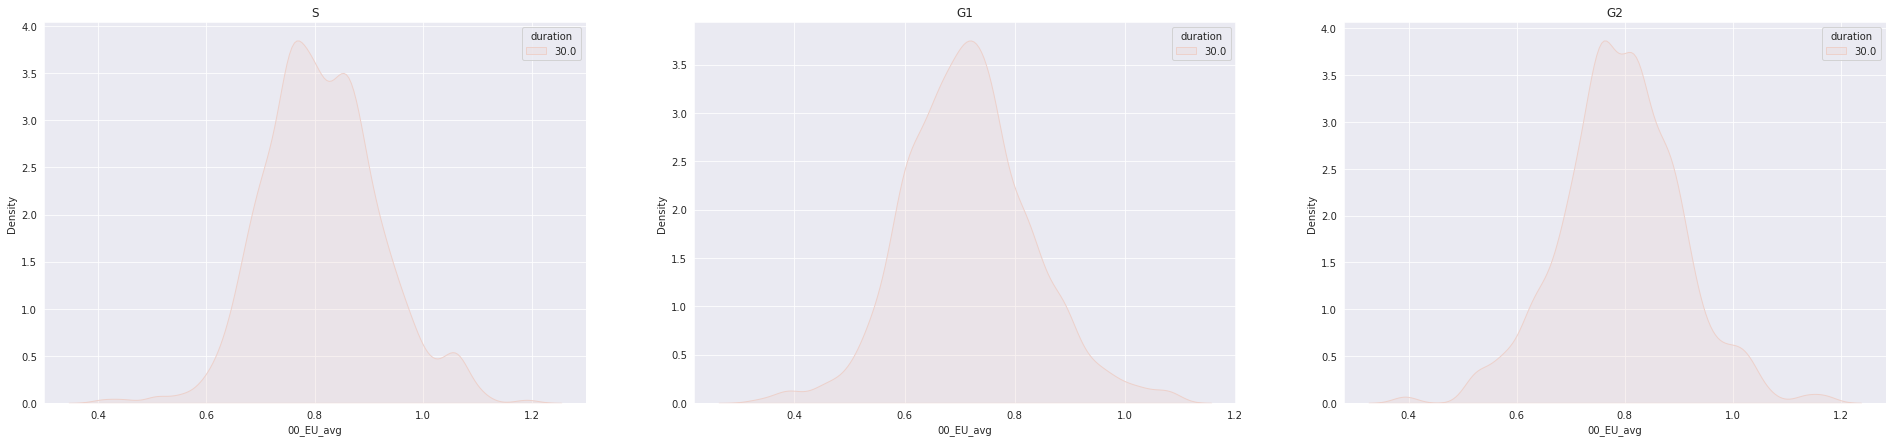

In [67]:
cell_cycles = meta_small.cell_cycle.unique()

plt.figure(figsize=(3*11,7))
for i, cc in enumerate(cell_cycles, 1):
    mask = meta_small.cell_cycle == cc
    mask &= (meta_small.perturbation == 'TSA')
    
    plt.subplot(1,3,i)
    sns.kdeplot(x='00_EU_avg', 
                hue='duration', 
                #hue_order=cell_cycle_order,
                data=meta_small[mask], 
                shade=True, 
                bw_method=0.2)
    plt.title(cc)

## No

Summary:
- Only "perturbation" and "cell_cylce" have influence over the TR distribution
- use only perturbations DMSO and normal

In [79]:
meta_small = metadata[['mapobject_id_cell', 'cell_cycle', 'perturbation', '00_EU_avg']].copy()
meta_small

,mapobject_id_cell,cell_cycle,perturbation,00_EU_avg
0,369487,S,CX5461,0.726790
1,369488,G1,CX5461,0.386809
2,369489,G1,CX5461,0.413402
3,369490,G1,CX5461,0.408767
4,369491,S,CX5461,0.571223
...,...,...,...,...
13095,266516,G2,normal,0.962255
13096,266518,G1,normal,1.142740
13097,266519,G2,normal,0.935372
13098,266520,G1,normal,0.821446


Since TR distribution depends on the cell cycle, then two test:
- Create a dataset only for G1 and another for S and G2
- Create only one dataset, but sample cells such that the dataset have same number of G1, S and G2 cells

In [89]:
mask = (meta_small.perturbation == 'DMSO') | (meta_small.perturbation == 'normal')
cell_cycles = meta_small.cell_cycle.unique()

for cc in cell_cycles:
    mask2 = mask & (meta_small.cell_cycle == cc)
    cc_count = meta_small[mask2].shape[0]
    print(cc, cc_count)

S 1070
G1 2070
G2 563


In [37]:
p = {}
p['seed'] = 123
p['train_frac'] = 0.8
p['val_frac'] = 0.1

perturbations = ['normal', 'DMSO']
cell_cycles = ['G1']

metadata = metadata.groupby(['mapobject_id_cell'], sort=False, as_index=False).first()
# filter acordinglly to the selected perturbations
filtered_metadata = metadata[metadata.perturbation.isin(perturbations) & metadata.cell_cycle.isin(cell_cycles)]

In [38]:
# create df containing the mapobject_id_cell and its set
set_df = pd.DataFrame(columns=['mapobject_id_cell', 'set'])

# create train, val and test partitions keeping the proportion of perturbation and cell_cycle
for per in perturbations:
    for cc in cell_cycles:
        # Create mask that contains the cells with the corresponding perturbation and cell_cycle
        mask = (filtered_metadata.perturbation == per) & (filtered_metadata.cell_cycle == cc)
        # get mapobject_id_cell and the size of the train, val and test partitions
        cell_ids = filtered_metadata[mask].mapobject_id_cell.values
        n_train = int(len(cell_ids) * p['train_frac'])
        n_val = int(len(cell_ids) * p['val_frac'])
        n_test = len(cell_ids) - n_train - n_val
        print('For partition (perturbation, cell_cycle)=({}, {}):'.format(per, cc))
        print('\tNumber of cells in train set: {}, val set: {}, test_set: {}\n\tTotal number of cells: {}\n'.format(n_train, n_val, n_test, n_train+n_val+n_test))

        # get the mapobject_id_cell belonging to the train, val and test partitions
        np.random.seed(p['seed'])
        np.random.shuffle(cell_ids)
        train_cell_ids = cell_ids[0:n_train]
        val_cell_ids = cell_ids[n_train:n_train+n_val]
        test_cell_ids = cell_ids[n_train+n_val:n_train+n_val+n_test]
        
        # Save cell id with its corresponding set
        temp_df = pd.DataFrame(train_cell_ids, columns=['mapobject_id_cell'])
        temp_df['set'] = 'train'
        set_df = pd.concat((set_df, temp_df), ignore_index=True)
        temp_df = pd.DataFrame(val_cell_ids, columns=['mapobject_id_cell'])
        temp_df['set'] = 'val'
        set_df = pd.concat((set_df, temp_df), ignore_index=True)
        temp_df = pd.DataFrame(test_cell_ids, columns=['mapobject_id_cell'])
        temp_df['set'] = 'test'
        set_df = pd.concat((set_df, temp_df), ignore_index=True)
# merge the filtered_metadata with the df containing the set
filtered_metadata = filtered_metadata.merge(set_df,
                        left_on='mapobject_id_cell',
                        right_on='mapobject_id_cell',
                        how='left')
        
n_train = np.sum(filtered_metadata.set == 'train')
n_val = np.sum(filtered_metadata.set == 'val')
n_test = np.sum(filtered_metadata.set == 'test')
print('Number of cells in train set: {}, val set: {}, test_set: {}\nTotal number of cells: {}\n'.format(n_train, n_val, n_test, n_train+n_val+n_test))

For partition (perturbation, cell_cycle)=(normal, G1):
	Number of cells in train set: 1140, val set: 142, test_set: 144
	Total number of cells: 1426

For partition (perturbation, cell_cycle)=(DMSO, G1):
	Number of cells in train set: 515, val set: 64, test_set: 65
	Total number of cells: 644

Number of cells in train set: 1655, val set: 206, test_set: 209
Total number of cells: 2070



In [43]:
subset = 'train'
mask = (filtered_metadata.set == subset)
filtered_cells = filtered_metadata.mapobject_id_cell[mask].values.astype(str)
filtered_cells

array(['263044', '263047', '364195', ..., '262738', '210124', '266512'],
      dtype='<U6')

In [43]:
target_perturbations = ['normal', 'DMSO']
target_cell_cycles = ['G1']

# Create mask that contains the target mapobject_id_cell acordinglly with the perturbation and cell_cycle criteria
mask = np.zeros(metadata.shape[0]).astype(np.bool)
for per in target_perturbations:
    mask |= metadata.perturbation == per
for cc in target_cell_cycles:
    mask &= metadata.cell_cycle == cc

metadata[mask]

,mapobject_id,plate_name,well_name,well_pos_y,well_pos_x,tpoint,zplane,label,is_border,mapobject_id_cell,plate_name_cell,well_name_cell,well_pos_y_cell,well_pos_x_cell,tpoint_cell,zplane_cell,label_cell,is_border_cell,is_mitotic,is_mitotic_labels,is_polynuclei_HeLa,is_polynuclei_HeLa_labels,is_polynuclei_184A1,is_polynuclei_184A1_labels,cell_cycle,cell_type,perturbation,duration,00_DAPI_avg,07_H2B_avg,01_CDK9_pT186_avg,03_CDK9_avg,05_GTF2B_avg,07_SETD1A_avg,08_H3K4me3_avg,09_SRRM2_avg,10_H3K27ac_avg,11_KPNA2_MAX_avg,12_RB1_pS807_S811_avg,13_PABPN1_avg,14_PCNA_avg,15_SON_avg,16_H3_avg,17_HDAC3_avg,19_KPNA1_MAX_avg,20_SP100_avg,21_NCL_avg,01_PABPC1_avg,02_CDK7_avg,03_RPS6_avg,05_Sm_avg,07_POLR2A_avg,09_CCNT1_avg,10_POL2RA_pS2_avg,11_PML_avg,12_YAP1_avg,13_POL2RA_pS5_avg,15_U2SNRNPB_avg,18_NONO_avg,20_ALYREF_avg,21_COIL_avg,00_BG488_avg,00_BG568_avg,00_EU_avg,09_SRRM2_ILASTIK_avg,15_SON_ILASTIK_avg
4367,263057,plate01,J16,0,0,0,0,6,0,263044,plate01,J16,0,0,0,0,6,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,DMSO,720.0,0.559914,0.673521,0.367085,0.416994,0.645986,0.562562,0.459997,0.536572,0.133353,0.747884,0.092656,0.680816,0.416561,0.450028,0.597563,0.924112,0.989534,0.139680,0.387210,0.756921,0.290736,0.915663,0.535581,0.474428,0.482097,0.738551,0.392874,0.724019,0.614959,0.582054,0.706530,0.590277,0.675308,0.910371,0.964073,0.789988,0.571108,0.550479
4369,263060,plate01,J16,0,0,0,0,9,0,263047,plate01,J16,0,0,0,0,9,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,DMSO,720.0,0.501752,0.544152,1.288875,1.577494,1.167879,1.208178,0.887331,1.574985,0.194347,0.647281,0.699402,0.854071,0.520319,1.073794,0.366597,1.098936,0.955131,1.623222,0.766097,0.825827,0.963407,1.126784,1.200570,1.321706,1.195229,0.813766,0.843695,1.097583,0.611882,1.071663,0.626599,0.408824,0.841230,0.998162,1.053085,1.172326,1.504990,1.011448
4372,364377,plate01,J16,0,1,0,0,16,0,364190,plate01,J16,0,1,0,0,16,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,DMSO,720.0,0.602427,0.774355,0.466658,0.578625,0.717787,0.502849,0.525678,0.530381,0.215161,0.462980,0.601882,0.706457,0.384828,0.559197,0.689008,0.619311,0.519019,0.546790,0.635413,0.376641,0.587950,0.535495,0.602359,0.517679,0.430845,0.877169,0.406116,0.431656,0.756563,0.506149,0.713877,0.729979,0.623625,0.568352,0.885829,0.823889,0.601848,0.688373
4375,364381,plate01,J16,0,1,0,0,20,0,364194,plate01,J16,0,1,0,0,20,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,DMSO,720.0,0.635524,0.813555,0.409325,0.591749,0.809583,0.300919,0.546370,0.759385,0.156538,0.446558,0.711936,0.717527,0.368288,0.653042,0.756524,0.581475,0.540922,0.558016,0.584978,0.320155,0.619451,0.500455,0.660010,0.628479,0.461650,0.785709,0.275579,0.455327,0.771088,0.539711,0.916688,0.842896,0.760016,0.575643,0.839296,0.673479,0.781761,0.775597
4376,364382,plate01,J16,0,1,0,0,21,0,364195,plate01,J16,0,1,0,0,21,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,DMSO,720.0,0.436704,0.567245,0.284972,0.376710,0.571165,0.393772,0.358408,0.468708,0.123928,0.276254,0.339783,0.525064,0.304278,0.523438,0.516612,0.506276,0.407601,0.321772,0.459581,0.278899,0.308826,0.382522,0.492428,0.417493,0.297031,0.733094,0.258409,0.287238,0.616878,0.420122,0.630320,0.617078,0.516705,0.494917,0.824544,0.736374,0.620735,0.629935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11900,195398,plate01,J12,4,3,0,0,60,0,195267,plate01,J12,4,3,0,0,60,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,normal,NaN,0.771491,0.565092,0.636713,0.993336,0.812013,0.232635,0.825019,0.136992,0.364689,0.722921,0.751757,1.068456,0.290313,0.168081,0.544502,0.591773,0.626469,0.205762,0.792477,0.663925,0.760857,0.701123,0.629179,0.527530,0.681989,0.887573,0.550069,0.414785,0.838548,0.580189,0.951450,0.551912,0.860169,0.695133,0.878112,0.929830,0.130135,0.162422
11902,262807,plate01,J12,4,4,0,0,48,0,262738,plate01,J12,4,4,0,0,48,0,0.0,NaN,0.0,NaN,0.0,NaN,G1

In [44]:
# get mapobject_id_cell and the size of the train, val and test partitions
cell_ids = metadata[mask].mapobject_id_cell.values
n_train = int(len(cell_ids) * p['train_frac'])
n_val = int(len(cell_ids) * p['val_frac'])
n_test = len(cell_ids) - n_train - n_val
print('Number of cells in train set: {}, val set: {}, test_set: {}\nTotal number of cells: {}'.format(n_train, n_val, n_test, n_train+n_val+n_test))

# get the mapobject_id_cell belonging to the train, val and test partitions
np.random.seed(p['seed'])
np.random.shuffle(cell_ids)
train_cell_ids = cell_ids[0:n_train]
val_cell_ids = cell_ids[n_train:n_train+n_val]
test_cell_ids = cell_ids[n_train+n_val:n_train+n_val+n_test]

# create df containing the mapobject_id_cell and its set
set_df = pd.DataFrame(columns=['mapobject_id_cell', 'set'])
temp_df = pd.DataFrame(train_cell_ids, columns=['mapobject_id_cell'])
temp_df['set'] = 'train'
set_df = pd.concat((set_df, temp_df), ignore_index=True)
temp_df = pd.DataFrame(val_cell_ids, columns=['mapobject_id_cell'])
temp_df['set'] = 'val'
set_df = pd.concat((set_df, temp_df), ignore_index=True)
temp_df = pd.DataFrame(test_cell_ids, columns=['mapobject_id_cell'])
temp_df['set'] = 'test'
set_df = pd.concat((set_df, temp_df), ignore_index=True)

# merge the filtered_metadata with the df containing the set
filtered_metadata = metadata[mask].merge(set_df,
                        left_on='mapobject_id_cell',
                        right_on='mapobject_id_cell',
                        how='left')

Number of cells in train set: 1656, val set: 207, test_set: 207
Total number of cells: 2070


In [45]:
print(len(filtered_metadata.mapobject_id_cell.unique()))
print((filtered_metadata.set == 'train').sum())
print((filtered_metadata.set == 'val').sum())
print((filtered_metadata.set == 'test').sum())

2070
1656
207
207


In [46]:
# take a look into the train, val, and test distribution

<AxesSubplot:xlabel='10_POL2RA_pS2_avg', ylabel='00_EU_avg'>

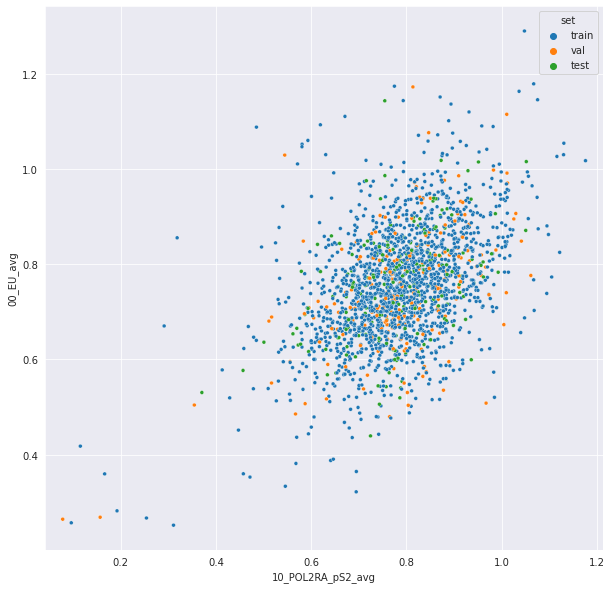

In [47]:
plt.figure(figsize=(10,10))
plt.axis('equal')
sns.scatterplot(data=filtered_metadata,
                x='10_POL2RA_pS2_avg',
                y='00_EU_avg',
                hue='set',
                hue_order=['train', 'val', 'test'],
                #alpha=0.5,
                s=15
               )

<AxesSubplot:xlabel='set', ylabel='00_EU_avg'>

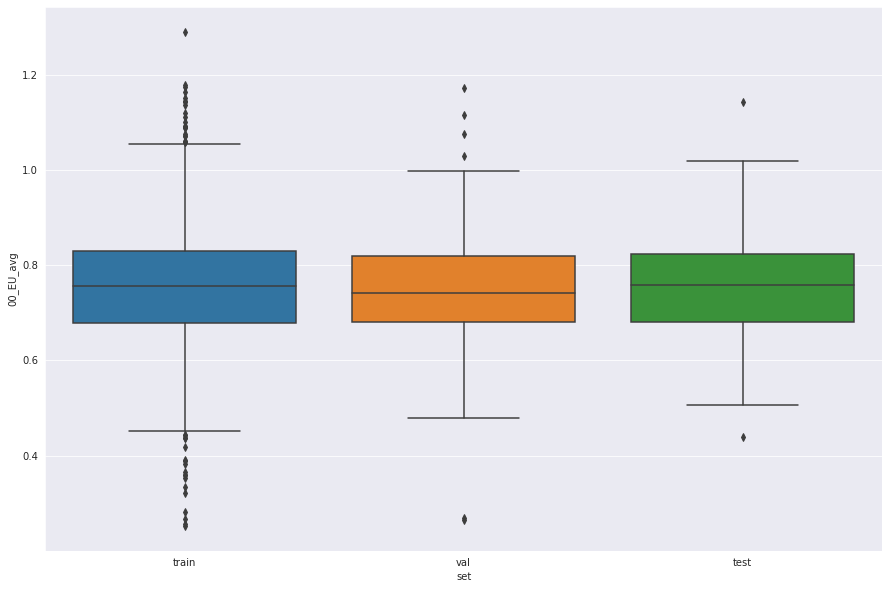

In [48]:
plt.figure(figsize=(15,10))
sns.boxplot(data=filtered_metadata,
            x='set',
            y='00_EU_avg'
           )

In [56]:
perturbations = ['normal', 'DMSO']
cell_cycles = ['G1']
metadata[metadata.perturbation.isin(perturbations) & metadata.cell_cycle.isin(cell_cycles)]

,mapobject_id_cell,mapobject_id,plate_name,well_name,well_pos_y,well_pos_x,tpoint,zplane,label,is_border,plate_name_cell,well_name_cell,well_pos_y_cell,well_pos_x_cell,tpoint_cell,zplane_cell,label_cell,is_border_cell,is_mitotic,is_mitotic_labels,is_polynuclei_HeLa,is_polynuclei_HeLa_labels,is_polynuclei_184A1,is_polynuclei_184A1_labels,cell_cycle,cell_type,perturbation,duration,00_DAPI_avg,07_H2B_avg,01_CDK9_pT186_avg,03_CDK9_avg,05_GTF2B_avg,07_SETD1A_avg,08_H3K4me3_avg,09_SRRM2_avg,10_H3K27ac_avg,11_KPNA2_MAX_avg,12_RB1_pS807_S811_avg,13_PABPN1_avg,14_PCNA_avg,15_SON_avg,16_H3_avg,17_HDAC3_avg,19_KPNA1_MAX_avg,20_SP100_avg,21_NCL_avg,01_PABPC1_avg,02_CDK7_avg,03_RPS6_avg,05_Sm_avg,07_POLR2A_avg,09_CCNT1_avg,10_POL2RA_pS2_avg,11_PML_avg,12_YAP1_avg,13_POL2RA_pS5_avg,15_U2SNRNPB_avg,18_NONO_avg,20_ALYREF_avg,21_COIL_avg,00_BG488_avg,00_BG568_avg,00_EU_avg,09_SRRM2_ILASTIK_avg,15_SON_ILASTIK_avg
4367,263044,263057,plate01,J16,0,0,0,0,6,0,plate01,J16,0,0,0,0,6,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,DMSO,720.0,0.559914,0.673521,0.367085,0.416994,0.645986,0.562562,0.459997,0.536572,0.133353,0.747884,0.092656,0.680816,0.416561,0.450028,0.597563,0.924112,0.989534,0.139680,0.387210,0.756921,0.290736,0.915663,0.535581,0.474428,0.482097,0.738551,0.392874,0.724019,0.614959,0.582054,0.706530,0.590277,0.675308,0.910371,0.964073,0.789988,0.571108,0.550479
4369,263047,263060,plate01,J16,0,0,0,0,9,0,plate01,J16,0,0,0,0,9,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,DMSO,720.0,0.501752,0.544152,1.288875,1.577494,1.167879,1.208178,0.887331,1.574985,0.194347,0.647281,0.699402,0.854071,0.520319,1.073794,0.366597,1.098936,0.955131,1.623222,0.766097,0.825827,0.963407,1.126784,1.200570,1.321706,1.195229,0.813766,0.843695,1.097583,0.611882,1.071663,0.626599,0.408824,0.841230,0.998162,1.053085,1.172326,1.504990,1.011448
4372,364190,364377,plate01,J16,0,1,0,0,16,0,plate01,J16,0,1,0,0,16,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,DMSO,720.0,0.602427,0.774355,0.466658,0.578625,0.717787,0.502849,0.525678,0.530381,0.215161,0.462980,0.601882,0.706457,0.384828,0.559197,0.689008,0.619311,0.519019,0.546790,0.635413,0.376641,0.587950,0.535495,0.602359,0.517679,0.430845,0.877169,0.406116,0.431656,0.756563,0.506149,0.713877,0.729979,0.623625,0.568352,0.885829,0.823889,0.601848,0.688373
4375,364194,364381,plate01,J16,0,1,0,0,20,0,plate01,J16,0,1,0,0,20,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,DMSO,720.0,0.635524,0.813555,0.409325,0.591749,0.809583,0.300919,0.546370,0.759385,0.156538,0.446558,0.711936,0.717527,0.368288,0.653042,0.756524,0.581475,0.540922,0.558016,0.584978,0.320155,0.619451,0.500455,0.660010,0.628479,0.461650,0.785709,0.275579,0.455327,0.771088,0.539711,0.916688,0.842896,0.760016,0.575643,0.839296,0.673479,0.781761,0.775597
4376,364195,364382,plate01,J16,0,1,0,0,21,0,plate01,J16,0,1,0,0,21,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,DMSO,720.0,0.436704,0.567245,0.284972,0.376710,0.571165,0.393772,0.358408,0.468708,0.123928,0.276254,0.339783,0.525064,0.304278,0.523438,0.516612,0.506276,0.407601,0.321772,0.459581,0.278899,0.308826,0.382522,0.492428,0.417493,0.297031,0.733094,0.258409,0.287238,0.616878,0.420122,0.630320,0.617078,0.516705,0.494917,0.824544,0.736374,0.620735,0.629935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11900,195267,195398,plate01,J12,4,3,0,0,60,0,plate01,J12,4,3,0,0,60,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,normal,NaN,0.771491,0.565092,0.636713,0.993336,0.812013,0.232635,0.825019,0.136992,0.364689,0.722921,0.751757,1.068456,0.290313,0.168081,0.544502,0.591773,0.626469,0.205762,0.792477,0.663925,0.760857,0.701123,0.629179,0.527530,0.681989,0.887573,0.550069,0.414785,0.838548,0.580189,0.951450,0.551912,0.860169,0.695133,0.878112,0.929830,0.130135,0.162422
11902,262738,262807,plate01,J12,4,4,0,0,48,0,plate01,J12,4,4,0,0,48,0,0.0,NaN,0.0,NaN,0.0,NaN,G1

# Sample without replacement (unique elements)

In [28]:
metadata = metadata.drop('set', axis=1)
perturbations = ['normal', 'DMSO']
cell_cycles = ['G1', 'S', 'G2']

mask = metadata.perturbation.isin(perturbations)
mask &= metadata.cell_cycle.isin(cell_cycles)

filtered_metadata = metadata[mask].copy()
filtered_metadata

,mapobject_id,plate_name,well_name,well_pos_y,well_pos_x,tpoint,zplane,label,is_border,mapobject_id_cell,plate_name_cell,well_name_cell,well_pos_y_cell,well_pos_x_cell,tpoint_cell,zplane_cell,label_cell,is_border_cell,is_mitotic,is_mitotic_labels,is_polynuclei_HeLa,is_polynuclei_HeLa_labels,is_polynuclei_184A1,is_polynuclei_184A1_labels,cell_cycle,cell_type,perturbation,duration,00_DAPI_avg,07_H2B_avg,01_CDK9_pT186_avg,03_CDK9_avg,05_GTF2B_avg,07_SETD1A_avg,08_H3K4me3_avg,09_SRRM2_avg,10_H3K27ac_avg,11_KPNA2_MAX_avg,12_RB1_pS807_S811_avg,13_PABPN1_avg,14_PCNA_avg,15_SON_avg,16_H3_avg,17_HDAC3_avg,19_KPNA1_MAX_avg,20_SP100_avg,21_NCL_avg,01_PABPC1_avg,02_CDK7_avg,03_RPS6_avg,05_Sm_avg,07_POLR2A_avg,09_CCNT1_avg,10_POL2RA_pS2_avg,11_PML_avg,12_YAP1_avg,13_POL2RA_pS5_avg,15_U2SNRNPB_avg,18_NONO_avg,20_ALYREF_avg,21_COIL_avg,00_BG488_avg,00_BG568_avg,00_EU_avg,09_SRRM2_ILASTIK_avg,15_SON_ILASTIK_avg
4365,263055,plate01,J16,0,0,0,0,4,0,263042,plate01,J16,0,0,0,0,4,0,0.0,NaN,0.0,NaN,0.0,NaN,S,184A1,DMSO,720.0,0.705659,1.028980,0.684189,0.746412,0.963699,0.691370,0.748778,0.765551,0.245359,0.908886,0.780641,0.716928,0.829434,0.768822,0.882689,1.156642,1.059710,0.513018,0.801879,0.834295,0.722357,1.115627,0.941399,0.743345,0.614370,0.900354,0.326190,0.540706,0.891108,0.671243,0.906927,0.835702,0.937988,0.964588,0.946783,0.915032,0.771456,0.697269
4366,263056,plate01,J16,0,0,0,0,5,0,263043,plate01,J16,0,0,0,0,5,0,0.0,NaN,0.0,NaN,0.0,NaN,S,184A1,DMSO,720.0,0.621474,0.910596,0.678523,0.730147,0.826866,0.598236,0.554406,0.744817,0.164135,0.873646,0.701342,0.662154,0.924794,0.762980,0.840988,1.070790,0.989439,0.401625,0.732974,0.671316,0.726729,0.950857,0.810480,0.693435,0.649292,0.865672,0.433144,0.699466,0.849924,0.632156,0.834961,0.906596,0.871321,0.883920,0.935159,0.978496,0.877303,0.829129
4367,263057,plate01,J16,0,0,0,0,6,0,263044,plate01,J16,0,0,0,0,6,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,DMSO,720.0,0.559914,0.673521,0.367085,0.416994,0.645986,0.562562,0.459997,0.536572,0.133353,0.747884,0.092656,0.680816,0.416561,0.450028,0.597563,0.924112,0.989534,0.139680,0.387210,0.756921,0.290736,0.915663,0.535581,0.474428,0.482097,0.738551,0.392874,0.724019,0.614959,0.582054,0.706530,0.590277,0.675308,0.910371,0.964073,0.789988,0.571108,0.550479
4368,263058,plate01,J16,0,0,0,0,7,0,263045,plate01,J16,0,0,0,0,7,0,0.0,NaN,0.0,NaN,0.0,NaN,S,184A1,DMSO,720.0,0.772267,0.880395,0.842348,0.965477,0.970396,0.954589,0.759372,0.786802,0.263008,1.172697,0.751818,0.725942,0.824342,0.774902,0.871545,1.083925,0.948059,0.697179,0.841382,0.664082,0.830332,0.874028,0.905953,0.943999,0.814373,0.841377,0.485284,0.677689,0.853363,0.702255,0.908915,0.837628,0.888862,0.887522,0.947727,0.784347,0.804344,0.726761
4369,263060,plate01,J16,0,0,0,0,9,0,263047,plate01,J16,0,0,0,0,9,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,DMSO,720.0,0.501752,0.544152,1.288875,1.577494,1.167879,1.208178,0.887331,1.574985,0.194347,0.647281,0.699402,0.854071,0.520319,1.073794,0.366597,1.098936,0.955131,1.623222,0.766097,0.825827,0.963407,1.126784,1.200570,1.321706,1.195229,0.813766,0.843695,1.097583,0.611882,1.071663,0.626599,0.408824,0.841230,0.998162,1.053085,1.172326,1.504990,1.011448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11905,196980,plate01,J12,5,3,0,0,16,0,196946,plate01,J12,5,3,0,0,16,0,0.0,NaN,0.0,NaN,0.0,NaN,S,184A1,normal,NaN,0.466116,0.427223,0.524259,0.559983,0.778531,0.549776,0.643514,0.551811,0.193130,0.478116,0.712937,0.743597,0.522384,0.581592,0.384521,0.480271,0.515179,0.437035,0.545412,0.428227,0.565138,0.481548,0.577957,0.520295,0.529232,0.743118,0.569474,0.409859,0.606166,0.481509,0.666436,0.509698,0.621739,0.579675,0.892434,0.762380,0.589774,0.685176
11906,266544,plate01,J12,5,4,0,0,23,0,266495,plate01,J12,5,4,0,0,23,0,0.0,NaN,0.0,NaN,0.0,NaN,S,184A1,norm

In [44]:
p = {}
p['seed'] = 123
p['train_frac'] = 0.8
p['val_frac'] = 0.1

# Get the convination with the minimum number of cells
min_cc_size = np.Inf
for cc in cell_cycles:
    mask = filtered_metadata.cell_cycle == cc
    cc_size = filtered_metadata[mask].shape[0]
    
    if cc_size < min_cc_size:
        min_cc_size = cc_size
        min_cc_name = cc
print(min_cc_name, min_cc_size)


n_train = int(min_cc_size * p['train_frac'])
n_val = int(min_cc_size * p['val_frac'])
n_test = min_cc_size - n_train - n_val
print(n_train, n_val, n_test)

# create df containing the mapobject_id_cell and its set
set_df = pd.DataFrame(columns=['mapobject_id_cell', 'set'])

for cc in cell_cycles:
    
    mask = (filtered_metadata.cell_cycle == cc)
    cell_ids = filtered_metadata[mask].mapobject_id_cell.values

    np.random.seed(p['seed'])
    np.random.shuffle(cell_ids)
    train_cell_ids = cell_ids[0:n_train]
    val_cell_ids = cell_ids[n_train:n_train+n_val]
    test_cell_ids = cell_ids[n_train+n_val:n_train+n_val+n_test]

    # Save cell id with its corresponding set
    temp_df = pd.DataFrame(train_cell_ids, columns=['mapobject_id_cell'])
    temp_df['set'] = 'train'
    set_df = pd.concat((set_df, temp_df), ignore_index=True)
    temp_df = pd.DataFrame(val_cell_ids, columns=['mapobject_id_cell'])
    temp_df['set'] = 'val'
    set_df = pd.concat((set_df, temp_df), ignore_index=True)
    temp_df = pd.DataFrame(test_cell_ids, columns=['mapobject_id_cell'])
    temp_df['set'] = 'test'
    set_df = pd.concat((set_df, temp_df), ignore_index=True)
set_df

G2 563
450 56 57


,mapobject_id_cell,set
0,366405,train
1,300003,train
2,224285,train
3,377469,train
4,284488,train
...,...,...
1684,348352,test
1685,261421,test
1686,281113,test
1687,345228,test


In [52]:
# merge the filtered_metadata with the df containing the set
filtered_metadata_2 = filtered_metadata.merge(set_df,
                                            left_on='mapobject_id_cell',
                                            right_on='mapobject_id_cell',
                                            how='right')
np.sum(filtered_metadata_2.set == 'test')

171

In [47]:
#np.random.choice(cell_ids, min_cc_size, replace=False)

In [48]:
#cell_ids

# Sample with replacement

In [4]:
metadata = metadata.drop('set', axis=1)
perturbations = ['normal', 'DMSO']
cell_cycles = ['G1', 'S', 'G2']

mask = metadata.perturbation.isin(perturbations)
mask &= metadata.cell_cycle.isin(cell_cycles)

filtered_metadata = metadata[mask].copy()
filtered_metadata

,mapobject_id,plate_name,well_name,well_pos_y,well_pos_x,tpoint,zplane,label,is_border,mapobject_id_cell,plate_name_cell,well_name_cell,well_pos_y_cell,well_pos_x_cell,tpoint_cell,zplane_cell,label_cell,is_border_cell,is_mitotic,is_mitotic_labels,is_polynuclei_HeLa,is_polynuclei_HeLa_labels,is_polynuclei_184A1,is_polynuclei_184A1_labels,cell_cycle,cell_type,perturbation,duration,00_DAPI_avg,07_H2B_avg,01_CDK9_pT186_avg,03_CDK9_avg,05_GTF2B_avg,07_SETD1A_avg,08_H3K4me3_avg,09_SRRM2_avg,10_H3K27ac_avg,11_KPNA2_MAX_avg,12_RB1_pS807_S811_avg,13_PABPN1_avg,14_PCNA_avg,15_SON_avg,16_H3_avg,17_HDAC3_avg,19_KPNA1_MAX_avg,20_SP100_avg,21_NCL_avg,01_PABPC1_avg,02_CDK7_avg,03_RPS6_avg,05_Sm_avg,07_POLR2A_avg,09_CCNT1_avg,10_POL2RA_pS2_avg,11_PML_avg,12_YAP1_avg,13_POL2RA_pS5_avg,15_U2SNRNPB_avg,18_NONO_avg,20_ALYREF_avg,21_COIL_avg,00_BG488_avg,00_BG568_avg,00_EU_avg,09_SRRM2_ILASTIK_avg,15_SON_ILASTIK_avg
4365,263055,plate01,J16,0,0,0,0,4,0,263042,plate01,J16,0,0,0,0,4,0,0.0,NaN,0.0,NaN,0.0,NaN,S,184A1,DMSO,720.0,0.705659,1.028980,0.684189,0.746412,0.963699,0.691370,0.748778,0.765551,0.245359,0.908886,0.780641,0.716928,0.829434,0.768822,0.882689,1.156642,1.059710,0.513018,0.801879,0.834295,0.722357,1.115627,0.941399,0.743345,0.614370,0.900354,0.326190,0.540706,0.891108,0.671243,0.906927,0.835702,0.937988,0.964588,0.946783,0.915032,0.771456,0.697269
4366,263056,plate01,J16,0,0,0,0,5,0,263043,plate01,J16,0,0,0,0,5,0,0.0,NaN,0.0,NaN,0.0,NaN,S,184A1,DMSO,720.0,0.621474,0.910596,0.678523,0.730147,0.826866,0.598236,0.554406,0.744817,0.164135,0.873646,0.701342,0.662154,0.924794,0.762980,0.840988,1.070790,0.989439,0.401625,0.732974,0.671316,0.726729,0.950857,0.810480,0.693435,0.649292,0.865672,0.433144,0.699466,0.849924,0.632156,0.834961,0.906596,0.871321,0.883920,0.935159,0.978496,0.877303,0.829129
4367,263057,plate01,J16,0,0,0,0,6,0,263044,plate01,J16,0,0,0,0,6,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,DMSO,720.0,0.559914,0.673521,0.367085,0.416994,0.645986,0.562562,0.459997,0.536572,0.133353,0.747884,0.092656,0.680816,0.416561,0.450028,0.597563,0.924112,0.989534,0.139680,0.387210,0.756921,0.290736,0.915663,0.535581,0.474428,0.482097,0.738551,0.392874,0.724019,0.614959,0.582054,0.706530,0.590277,0.675308,0.910371,0.964073,0.789988,0.571108,0.550479
4368,263058,plate01,J16,0,0,0,0,7,0,263045,plate01,J16,0,0,0,0,7,0,0.0,NaN,0.0,NaN,0.0,NaN,S,184A1,DMSO,720.0,0.772267,0.880395,0.842348,0.965477,0.970396,0.954589,0.759372,0.786802,0.263008,1.172697,0.751818,0.725942,0.824342,0.774902,0.871545,1.083925,0.948059,0.697179,0.841382,0.664082,0.830332,0.874028,0.905953,0.943999,0.814373,0.841377,0.485284,0.677689,0.853363,0.702255,0.908915,0.837628,0.888862,0.887522,0.947727,0.784347,0.804344,0.726761
4369,263060,plate01,J16,0,0,0,0,9,0,263047,plate01,J16,0,0,0,0,9,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,DMSO,720.0,0.501752,0.544152,1.288875,1.577494,1.167879,1.208178,0.887331,1.574985,0.194347,0.647281,0.699402,0.854071,0.520319,1.073794,0.366597,1.098936,0.955131,1.623222,0.766097,0.825827,0.963407,1.126784,1.200570,1.321706,1.195229,0.813766,0.843695,1.097583,0.611882,1.071663,0.626599,0.408824,0.841230,0.998162,1.053085,1.172326,1.504990,1.011448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11905,196980,plate01,J12,5,3,0,0,16,0,196946,plate01,J12,5,3,0,0,16,0,0.0,NaN,0.0,NaN,0.0,NaN,S,184A1,normal,NaN,0.466116,0.427223,0.524259,0.559983,0.778531,0.549776,0.643514,0.551811,0.193130,0.478116,0.712937,0.743597,0.522384,0.581592,0.384521,0.480271,0.515179,0.437035,0.545412,0.428227,0.565138,0.481548,0.577957,0.520295,0.529232,0.743118,0.569474,0.409859,0.606166,0.481509,0.666436,0.509698,0.621739,0.579675,0.892434,0.762380,0.589774,0.685176
11906,266544,plate01,J12,5,4,0,0,23,0,266495,plate01,J12,5,4,0,0,23,0,0.0,NaN,0.0,NaN,0.0,NaN,S,184A1,norm

In [134]:
p = {}
p['seed'] = 123
p['train_frac'] = 0.8
p['val_frac'] = 0.1
p['sample_size_per_cell_cycle'] = 1000

# same number of cells of each cell cycle will be added to each set
n_train_cc = int(p['sample_size_per_cell_cycle'] * p['train_frac'])
n_val_cc = int(p['sample_size_per_cell_cycle'] * p['val_frac'])
n_test_cc = int(p['sample_size_per_cell_cycle'] - n_train_cc - n_val_cc)

print('TFDS size: {}\n\ttrain: {}\n\tval: {}\n\ttest: {}'.format(len(cell_cycles)*(n_train_cc+n_val_cc+n_test_cc),
                                                                 len(cell_cycles)*n_train_cc,
                                                                 len(cell_cycles)*n_val_cc,
                                                                 len(cell_cycles)*n_test_cc))
# create df containing the mapobject_id_cell and its set
set_df = pd.DataFrame(columns=['mapobject_id_cell', 'set'])

# Get the cell ids for the test and validation (unique elements (without replacemnt) 
# and not mixed with train!)
for cc in cell_cycles:
    print('\nSampling {} cell cycle...'.format(cc))
    mask = (filtered_metadata.cell_cycle == cc)
    cell_ids = filtered_metadata[mask].mapobject_id_cell.values
    print('{} unique cells'.format(len(cell_ids)))
    
    np.random.seed(p['seed'])
    print('Sampling (with replacement) {} cells (from {}) for val set'.format(n_val_cc, len(cell_ids)))
    val_cell_ids = np.random.choice(cell_ids, n_val_cc, replace=True)
    remaining_cell_ids = [cell_id for cell_id in cell_ids if cell_id not in val_cell_ids]
    
    print('Sampling (with replacement) {} cells (from {}) for test set'.format(n_test_cc, len(remaining_cell_ids)))
    test_cell_ids = np.random.choice(remaining_cell_ids, n_test_cc, replace=True)
    remaining_cell_ids = [cell_id for cell_id in remaining_cell_ids if cell_id not in test_cell_ids]
    
    print('Sampling (with replacement) {} cells (from {}) for train set'.format(n_train_cc, len(remaining_cell_ids)))
    train_cell_ids = np.random.choice(remaining_cell_ids, n_train_cc, replace=True)
    
    
    
    # Save cell id with its corresponding set
    temp_df = pd.DataFrame(train_cell_ids, columns=['mapobject_id_cell'])
    temp_df['set'] = 'train'
    set_df = pd.concat((set_df, temp_df), ignore_index=True)
    temp_df = pd.DataFrame(val_cell_ids, columns=['mapobject_id_cell'])
    temp_df['set'] = 'val'
    set_df = pd.concat((set_df, temp_df), ignore_index=True)
    temp_df = pd.DataFrame(test_cell_ids, columns=['mapobject_id_cell'])
    temp_df['set'] = 'test'
    set_df = pd.concat((set_df, temp_df), ignore_index=True)
    set_df
    
filtered_metadata_2 = filtered_metadata.merge(set_df,
                                            left_on='mapobject_id_cell',
                                            right_on='mapobject_id_cell',
                                            how='right')

filtered_metadata_2

TFDS size: 3000
	train: 2400
	val: 300
	test: 300

Sampling G1 cell cycle...
2070 unique cells
Sampling (with replacement) 100 cells (from 2070) for val set
Sampling (with replacement) 100 cells (from 1972) for test set
Sampling (with replacement) 800 cells (from 1874) for train set

Sampling S cell cycle...
1070 unique cells
Sampling (with replacement) 100 cells (from 1070) for val set
Sampling (with replacement) 100 cells (from 974) for test set
Sampling (with replacement) 800 cells (from 881) for train set

Sampling G2 cell cycle...
563 unique cells
Sampling (with replacement) 100 cells (from 563) for val set
Sampling (with replacement) 100 cells (from 471) for test set
Sampling (with replacement) 800 cells (from 380) for train set


,mapobject_id,plate_name,well_name,well_pos_y,well_pos_x,tpoint,zplane,label,is_border,mapobject_id_cell,plate_name_cell,well_name_cell,well_pos_y_cell,well_pos_x_cell,tpoint_cell,zplane_cell,label_cell,is_border_cell,is_mitotic,is_mitotic_labels,is_polynuclei_HeLa,is_polynuclei_HeLa_labels,is_polynuclei_184A1,is_polynuclei_184A1_labels,cell_cycle,cell_type,perturbation,duration,00_DAPI_avg,07_H2B_avg,01_CDK9_pT186_avg,03_CDK9_avg,05_GTF2B_avg,07_SETD1A_avg,08_H3K4me3_avg,09_SRRM2_avg,10_H3K27ac_avg,11_KPNA2_MAX_avg,12_RB1_pS807_S811_avg,13_PABPN1_avg,14_PCNA_avg,15_SON_avg,16_H3_avg,17_HDAC3_avg,19_KPNA1_MAX_avg,20_SP100_avg,21_NCL_avg,01_PABPC1_avg,02_CDK7_avg,03_RPS6_avg,05_Sm_avg,07_POLR2A_avg,09_CCNT1_avg,10_POL2RA_pS2_avg,11_PML_avg,12_YAP1_avg,13_POL2RA_pS5_avg,15_U2SNRNPB_avg,18_NONO_avg,20_ALYREF_avg,21_COIL_avg,00_BG488_avg,00_BG568_avg,00_EU_avg,09_SRRM2_ILASTIK_avg,15_SON_ILASTIK_avg,set
0,268760,plate01,J12,0,2,0,0,30,0,331813,plate01,J12,0,2,0,0,30,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,normal,NaN,0.589343,0.730617,0.339453,0.275512,0.545130,0.261070,0.485512,0.424994,0.115571,0.402045,0.402691,0.552005,0.275029,0.532530,0.826470,0.583480,0.741380,0.459207,0.639510,0.311659,0.379854,0.452421,0.585529,0.317867,0.276317,0.773611,0.769587,0.356306,0.803621,0.485520,0.699311,0.749175,0.630583,0.487121,0.797992,0.684793,0.520500,0.622497,train
1,257524,plate01,J12,2,1,0,0,43,0,200702,plate01,J12,2,1,0,0,43,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,normal,NaN,0.629436,0.340258,0.593980,0.653822,0.656338,0.701181,0.738568,0.513386,0.245648,0.261838,0.374002,0.784741,0.248234,0.548465,0.276741,0.232244,0.319046,0.781358,0.467501,0.434981,0.647872,0.504677,0.520041,0.544825,0.461201,0.925874,0.779649,0.276008,0.511279,0.514861,0.544505,0.386534,0.555729,0.630033,0.930990,0.774763,0.608787,0.706790,train
2,212785,plate01,J10,1,4,0,0,5,0,348033,plate01,J10,1,4,0,0,5,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,normal,NaN,0.699889,0.788967,0.610805,0.739363,0.607358,0.402873,0.669166,0.758702,0.173957,0.586349,0.024465,0.808765,0.388626,0.769466,0.916949,0.651518,0.652585,0.308085,0.625608,0.419021,0.575512,0.542784,0.600629,0.545735,0.634947,0.804013,0.501158,0.572364,0.867701,0.541501,0.965012,0.925983,0.844969,0.612738,0.891080,0.503774,0.789510,0.842057,train
3,213681,plate01,I14,1,3,0,0,50,0,235357,plate01,I14,1,3,0,0,50,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,DMSO,120.0,0.600319,0.675007,0.587822,0.590691,0.686827,0.712802,0.792870,0.809170,0.230950,0.392889,0.786700,0.793572,0.330749,0.735330,0.541144,0.607749,0.448895,0.562405,0.825926,0.488152,0.758238,0.616935,0.748100,0.635450,0.522250,0.988065,0.515872,0.366685,0.850556,0.675724,0.888437,0.698612,0.718127,0.750095,0.914053,0.829869,0.759622,0.755766,train
4,261491,plate01,I11,1,2,0,0,39,0,366424,plate01,I11,1,2,0,0,39,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,normal,NaN,0.627349,0.601169,0.393749,0.582803,0.639636,0.167688,0.521912,0.635540,0.285190,0.294866,0.824816,0.713129,0.206018,0.373628,0.507877,0.374875,0.303759,0.265600,0.599400,0.251549,0.620199,0.365237,0.398830,0.515737,0.527185,0.725188,0.284633,0.403905,0.490642,0.446112,0.776280,0.592240,0.702385,0.413240,0.701007,0.702235,0.759171,0.597517,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,321072,plate01,J10,0,2,0,0,28,0,331818,plate01,J10,0,2,0,0,28,0,0.0,NaN,0.0,NaN,0.0,NaN,G2,184A1,normal,NaN,0.764009,0.399201,0.570463,0.603008,0.298689,0.361692,0.696328,0.094822,0.064835,1.428940,0.022362,0.511900,0.200268,0.082976,0.307057,0.411065,0.317805,0.083501,0.366298,0.738480,0.419243,0.649111,0.423834,0.324475,0.541475,0.112840,0.954542,1.036854,0.300806,0.455565,0.562045,0.284191,0.616496,0.714897,0.930015,0.308575,0.056062,0.060905,test
2996,271538,plate01,I11,1,0,0,0,18,0,256506,plate01,I11,1,0,0,0,18,

In [129]:
np.sum(filtered_metadata_2.cell_cycle == 'G2')

1000

In [52]:
# merge the filtered_metadata with the df containing the set
filtered_metadata_2 = filtered_metadata.merge(set_df,
                                            left_on='mapobject_id_cell',
                                            right_on='mapobject_id_cell',
                                            how='right')
np.sum(filtered_metadata_2.set == 'test')

171

In [47]:
#np.random.choice(cell_ids, min_cc_size, replace=False)

In [48]:
#cell_ids

In [4]:
metadata

,mapobject_id_cell,mapobject_id,plate_name,well_name,well_pos_y,well_pos_x,tpoint,zplane,label,is_border,plate_name_cell,well_name_cell,well_pos_y_cell,well_pos_x_cell,tpoint_cell,zplane_cell,label_cell,is_border_cell,is_mitotic,is_mitotic_labels,is_polynuclei_HeLa,is_polynuclei_HeLa_labels,is_polynuclei_184A1,is_polynuclei_184A1_labels,cell_cycle,cell_type,perturbation,duration,cell_size,00_DAPI_avg,07_H2B_avg,01_CDK9_pT186_avg,03_CDK9_avg,05_GTF2B_avg,07_SETD1A_avg,08_H3K4me3_avg,09_SRRM2_avg,10_H3K27ac_avg,11_KPNA2_MAX_avg,12_RB1_pS807_S811_avg,13_PABPN1_avg,14_PCNA_avg,15_SON_avg,16_H3_avg,17_HDAC3_avg,19_KPNA1_MAX_avg,20_SP100_avg,21_NCL_avg,01_PABPC1_avg,02_CDK7_avg,03_RPS6_avg,05_Sm_avg,07_POLR2A_avg,09_CCNT1_avg,10_POL2RA_pS2_avg,11_PML_avg,12_YAP1_avg,13_POL2RA_pS5_avg,15_U2SNRNPB_avg,18_NONO_avg,20_ALYREF_avg,21_COIL_avg,00_BG488_avg,00_BG568_avg,00_EU_avg,09_SRRM2_ILASTIK_avg,15_SON_ILASTIK_avg
0,369487,369581,plate01,I18,0,0,0,0,9,0,plate01,I18,0,0,0,0,9,0,0.0,NaN,0.0,NaN,0.0,NaN,S,184A1,CX5461,120.0,13503.0,44.790928,208.676435,15.962250,29.289384,84.024075,24.177410,46.880668,50.661738,107.367649,59.570214,95.348947,162.164103,75.340100,41.983402,233.016897,75.355192,83.016410,19.006747,47.585081,21.462703,119.898365,22.528784,45.912931,104.033265,80.562506,303.177564,11.478352,93.097852,221.812826,39.005296,287.133040,266.622592,7.860114,6.162881,1.671627,342.910464,7830.081611,10304.112271
1,369488,369582,plate01,I18,0,0,0,0,10,0,plate01,I18,0,0,0,0,10,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,CX5461,120.0,9775.0,44.693453,192.564041,14.927710,32.759411,92.919336,27.445029,50.696422,53.129896,67.922149,41.104070,101.088256,191.014345,45.255686,49.039914,196.708995,66.276975,63.790027,21.981683,40.383979,14.368812,146.185885,19.856793,46.780805,132.973481,85.893447,288.406003,14.120230,102.825017,205.574996,42.433129,312.214706,231.791821,8.029727,6.515615,1.657841,182.502609,7826.491151,10242.813811
2,369489,369583,plate01,I18,0,0,0,0,11,0,plate01,I18,0,0,0,0,11,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,CX5461,120.0,10330.0,40.628654,224.238141,11.883508,25.218904,88.832127,29.588301,46.845729,54.031310,61.636522,47.324893,120.000485,186.245955,58.354520,43.540287,263.274235,72.690354,76.520639,26.116184,47.600271,18.067183,125.463465,20.618981,52.433856,121.306955,80.992489,292.695766,13.591581,111.875495,221.776828,39.558433,333.519357,310.301499,8.908267,6.080175,1.548610,195.049564,6211.161568,10094.878316
3,369490,369584,plate01,I18,0,0,0,0,12,0,plate01,I18,0,0,0,0,12,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,CX5461,120.0,9867.0,47.190139,255.008827,8.761640,22.483270,86.429829,7.113698,28.268655,50.675528,54.239803,39.124333,88.022382,157.279270,31.450823,28.895709,260.202417,59.677551,66.606941,10.139325,47.945185,16.539284,105.200716,20.212364,47.114630,55.256595,58.227016,254.808453,10.881472,98.594081,247.179793,37.353835,326.267001,289.691050,7.332875,5.868882,1.554583,192.862674,6784.361001,7852.095976
4,369491,369585,plate01,I18,0,0,0,0,13,0,plate01,I18,0,0,0,0,13,0,0.0,NaN,0.0,NaN,0.0,NaN,S,184A1,CX5461,120.0,26927.0,44.595874,155.674791,22.491115,34.184902,118.482454,43.344288,51.013306,58.614662,52.146755,78.335567,127.013187,171.134241,75.371029,45.063884,164.659560,78.160541,86.018186,18.520590,35.027228,25.870875,225.888079,24.161104,54.150928,151.001520,112.756650,267.606364,18.161617,154.100137,183.721177,47.454413,289.719015,209.839964,9.956070,7.354605,1.695586,269.511643,7898.951239,9751.622238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11905,266516,266565,plate01,J12,5,4,0,0,44,0,plate01,J12,5,4,0,0,44,0,0.0,NaN,0.0,NaN,0.0,NaN,G2,184A1,normal,NaN,19401.0,38.974759,76.047797,17.563898,36.184834,104.156500,36.770887,50.232165,39.952018,108.585726,60.649794,121.661078,190.923176,43.49

In [14]:
perturbations = ['normal', 'DMSO']
cell_cycles = ['G1', 'S', 'G2']
p = {}
p['seed'] = 123
p['train_frac'] = 0.8
p['val_frac'] = 0.1

mask = metadata.perturbation.isin(perturbations)
mask &= metadata.cell_cycle.isin(cell_cycles)
# Filter metadata
filtered_metadata = metadata[mask].copy()
filtered_metadata

,mapobject_id_cell,mapobject_id,plate_name,well_name,well_pos_y,well_pos_x,tpoint,zplane,label,is_border,plate_name_cell,well_name_cell,well_pos_y_cell,well_pos_x_cell,tpoint_cell,zplane_cell,label_cell,is_border_cell,is_mitotic,is_mitotic_labels,is_polynuclei_HeLa,is_polynuclei_HeLa_labels,is_polynuclei_184A1,is_polynuclei_184A1_labels,cell_cycle,cell_type,perturbation,duration,cell_size,00_DAPI_avg,07_H2B_avg,01_CDK9_pT186_avg,03_CDK9_avg,05_GTF2B_avg,07_SETD1A_avg,08_H3K4me3_avg,09_SRRM2_avg,10_H3K27ac_avg,11_KPNA2_MAX_avg,12_RB1_pS807_S811_avg,13_PABPN1_avg,14_PCNA_avg,15_SON_avg,16_H3_avg,17_HDAC3_avg,19_KPNA1_MAX_avg,20_SP100_avg,21_NCL_avg,01_PABPC1_avg,02_CDK7_avg,03_RPS6_avg,05_Sm_avg,07_POLR2A_avg,09_CCNT1_avg,10_POL2RA_pS2_avg,11_PML_avg,12_YAP1_avg,13_POL2RA_pS5_avg,15_U2SNRNPB_avg,18_NONO_avg,20_ALYREF_avg,21_COIL_avg,00_BG488_avg,00_BG568_avg,00_EU_avg,09_SRRM2_ILASTIK_avg,15_SON_ILASTIK_avg
5461,263042,263055,plate01,J16,0,0,0,0,4,0,plate01,J16,0,0,0,0,4,0,0.0,NaN,0.0,NaN,0.0,NaN,S,184A1,DMSO,720.0,8401.0,39.610201,282.212391,14.709787,34.481345,122.127518,29.408288,48.079878,56.508154,71.844750,93.999276,108.771761,157.808500,85.331438,43.616172,323.670767,128.386167,134.658031,18.805303,57.414965,26.659837,122.008728,35.669525,62.715594,133.643428,77.230008,283.199741,6.970504,92.891114,280.267874,41.649294,350.631178,356.940289,10.909557,8.600135,1.771257,431.543626,7754.927152,9285.622307
5462,263043,263056,plate01,J16,0,0,0,0,5,0,plate01,J16,0,0,0,0,5,0,0.0,NaN,0.0,NaN,0.0,NaN,S,184A1,DMSO,720.0,12207.0,34.884746,249.743762,14.587963,33.729957,104.787060,25.446742,35.599046,54.977671,48.061287,90.354757,97.722536,145.751775,95.141995,43.284735,308.379265,118.856662,125.728553,14.722060,52.481306,21.451844,122.747143,30.401393,53.993867,124.670275,81.619971,272.290742,9.256049,120.165421,267.314880,39.224038,322.807908,387.219828,10.134157,7.880916,1.749512,461.474236,8818.934136,11041.621938
5463,263044,263057,plate01,J16,0,0,0,0,6,0,plate01,J16,0,0,0,0,6,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,DMSO,720.0,15734.0,31.429217,184.722779,7.892179,19.263491,81.864454,23.929299,29.536900,39.606383,39.047856,77.348039,12.910413,149.859577,42.855445,25.530594,219.118552,102.575527,125.740665,5.120140,27.724444,24.187370,49.106275,29.276163,35.680201,85.295744,60.602490,232.305672,8.395510,124.383677,193.414682,36.115297,273.154826,252.115717,7.854372,8.116748,1.803605,372.570739,5740.956972,7330.808440
5464,263045,263058,plate01,J16,0,0,0,0,7,0,plate01,J16,0,0,0,0,7,0,0.0,NaN,0.0,NaN,0.0,NaN,S,184A1,DMSO,720.0,15767.0,43.349090,241.460906,18.110119,44.601291,122.976267,40.604674,48.760110,58.076779,77.012867,121.283321,104.755645,159.792550,84.807594,43.961097,319.584115,120.314566,120.470444,25.555966,60.243330,21.220701,140.246102,27.944981,60.354207,169.718381,102.371663,264.648847,10.370258,116.424263,268.396552,43.573547,351.399875,357.762600,10.338172,7.913029,1.773024,369.910382,8085.528636,9678.381810
5465,263047,263060,plate01,J16,0,0,0,0,9,0,plate01,J16,0,0,0,0,9,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,DMSO,720.0,11930.0,28.164459,149.241408,27.710272,72.874109,148.002903,51.391368,56.976488,116.255474,56.907744,66.943473,97.452245,187.995952,53.530015,60.917580,134.426297,121.980833,121.369045,59.501243,54.852952,26.389251,162.722979,36.026263,79.981471,237.625004,150.247531,255.964144,18.029298,188.560486,192.446750,66.494555,242.252349,174.614508,9.784177,8.899475,1.970130,552.887343,15128.646940,13469.590947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11905,266516,266565,plate01,J12,5,4,0,0,44,0,plate01,J12,5,4,0,0,44,0,0.0,NaN,0.0,NaN,0.0,NaN,G2,184A1,normal,NaN,19401.0,38.974759,76.047797,17.563898,36.184834,104.156500,36.770887,50.232165,39.952018,108.585726,60.649794,121.661078,190.9

In [20]:

set_df = pd.DataFrame(columns=['mapobject_id_cell', 'set'])

cell_ids = filtered_metadata.mapobject_id_cell.unique()

n_train = int(len(cell_ids) * p['train_frac'])
n_val = int(len(cell_ids) * p['val_frac'])
n_test = len(cell_ids) - n_train - n_val

np.random.seed(p['seed'])
np.random.shuffle(cell_ids)

train_cell_ids = cell_ids[0:n_train]
val_cell_ids = cell_ids[n_train:n_train+n_val]
test_cell_ids = cell_ids[n_train+n_val:n_train+n_val+n_test]

temp_df = pd.DataFrame(train_cell_ids, columns=['mapobject_id_cell'])
temp_df['set'] = 'train'
set_df = pd.concat((set_df, temp_df), ignore_index=True)
temp_df = pd.DataFrame(val_cell_ids, columns=['mapobject_id_cell'])
temp_df['set'] = 'val'
set_df = pd.concat((set_df, temp_df), ignore_index=True)
temp_df = pd.DataFrame(test_cell_ids, columns=['mapobject_id_cell'])
temp_df['set'] = 'test'
set_df = pd.concat((set_df, temp_df), ignore_index=True)

filtered_metadata = filtered_metadata.merge(set_df,
		                        left_on='mapobject_id_cell',
		                        right_on='mapobject_id_cell',
		                        how='left')

In [21]:
filtered_metadata

,mapobject_id_cell,mapobject_id,plate_name,well_name,well_pos_y,well_pos_x,tpoint,zplane,label,is_border,plate_name_cell,well_name_cell,well_pos_y_cell,well_pos_x_cell,tpoint_cell,zplane_cell,label_cell,is_border_cell,is_mitotic,is_mitotic_labels,is_polynuclei_HeLa,is_polynuclei_HeLa_labels,is_polynuclei_184A1,is_polynuclei_184A1_labels,cell_cycle,cell_type,perturbation,duration,cell_size,00_DAPI_avg,07_H2B_avg,01_CDK9_pT186_avg,03_CDK9_avg,05_GTF2B_avg,07_SETD1A_avg,08_H3K4me3_avg,09_SRRM2_avg,10_H3K27ac_avg,11_KPNA2_MAX_avg,12_RB1_pS807_S811_avg,13_PABPN1_avg,14_PCNA_avg,15_SON_avg,16_H3_avg,17_HDAC3_avg,19_KPNA1_MAX_avg,20_SP100_avg,21_NCL_avg,01_PABPC1_avg,02_CDK7_avg,03_RPS6_avg,05_Sm_avg,07_POLR2A_avg,09_CCNT1_avg,10_POL2RA_pS2_avg,11_PML_avg,12_YAP1_avg,13_POL2RA_pS5_avg,15_U2SNRNPB_avg,18_NONO_avg,20_ALYREF_avg,21_COIL_avg,00_BG488_avg,00_BG568_avg,00_EU_avg,09_SRRM2_ILASTIK_avg,15_SON_ILASTIK_avg,set
0,263042,263055,plate01,J16,0,0,0,0,4,0,plate01,J16,0,0,0,0,4,0,0.0,NaN,0.0,NaN,0.0,NaN,S,184A1,DMSO,720.0,8401.0,39.610201,282.212391,14.709787,34.481345,122.127518,29.408288,48.079878,56.508154,71.844750,93.999276,108.771761,157.808500,85.331438,43.616172,323.670767,128.386167,134.658031,18.805303,57.414965,26.659837,122.008728,35.669525,62.715594,133.643428,77.230008,283.199741,6.970504,92.891114,280.267874,41.649294,350.631178,356.940289,10.909557,8.600135,1.771257,431.543626,7754.927152,9285.622307,train
1,263043,263056,plate01,J16,0,0,0,0,5,0,plate01,J16,0,0,0,0,5,0,0.0,NaN,0.0,NaN,0.0,NaN,S,184A1,DMSO,720.0,12207.0,34.884746,249.743762,14.587963,33.729957,104.787060,25.446742,35.599046,54.977671,48.061287,90.354757,97.722536,145.751775,95.141995,43.284735,308.379265,118.856662,125.728553,14.722060,52.481306,21.451844,122.747143,30.401393,53.993867,124.670275,81.619971,272.290742,9.256049,120.165421,267.314880,39.224038,322.807908,387.219828,10.134157,7.880916,1.749512,461.474236,8818.934136,11041.621938,test
2,263044,263057,plate01,J16,0,0,0,0,6,0,plate01,J16,0,0,0,0,6,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,DMSO,720.0,15734.0,31.429217,184.722779,7.892179,19.263491,81.864454,23.929299,29.536900,39.606383,39.047856,77.348039,12.910413,149.859577,42.855445,25.530594,219.118552,102.575527,125.740665,5.120140,27.724444,24.187370,49.106275,29.276163,35.680201,85.295744,60.602490,232.305672,8.395510,124.383677,193.414682,36.115297,273.154826,252.115717,7.854372,8.116748,1.803605,372.570739,5740.956972,7330.808440,train
3,263045,263058,plate01,J16,0,0,0,0,7,0,plate01,J16,0,0,0,0,7,0,0.0,NaN,0.0,NaN,0.0,NaN,S,184A1,DMSO,720.0,15767.0,43.349090,241.460906,18.110119,44.601291,122.976267,40.604674,48.760110,58.076779,77.012867,121.283321,104.755645,159.792550,84.807594,43.961097,319.584115,120.314566,120.470444,25.555966,60.243330,21.220701,140.246102,27.944981,60.354207,169.718381,102.371663,264.648847,10.370258,116.424263,268.396552,43.573547,351.399875,357.762600,10.338172,7.913029,1.773024,369.910382,8085.528636,9678.381810,test
4,263047,263060,plate01,J16,0,0,0,0,9,0,plate01,J16,0,0,0,0,9,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,DMSO,720.0,11930.0,28.164459,149.241408,27.710272,72.874109,148.002903,51.391368,56.976488,116.255474,56.907744,66.943473,97.452245,187.995952,53.530015,60.917580,134.426297,121.980833,121.369045,59.501243,54.852952,26.389251,162.722979,36.026263,79.981471,237.625004,150.247531,255.964144,18.029298,188.560486,192.446750,66.494555,242.252349,174.614508,9.784177,8.899475,1.970130,552.887343,15128.646940,13469.590947,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3698,266516,266565,plate01,J12,5,4,0,0,44,0,plate01,J12,5,4,0,0,44,0,0.0,NaN,0.0,NaN,0.0,NaN,G2,184A1,normal,NaN,19401.0,38.974759,76.047797,17.563898,36.184834,104.156500,36.770887,50.232165,39.952018,108.585726,60.649

In [32]:
mask = filtered_metadata.set == 'val'
mask_2 = filtered_metadata.set == 'train'
np.sum(filtered_metadata.mapobject_id_cell[mask_2].isin(filtered_metadata.mapobject_id_cell[mask]))

0